## 回归

### 线性回归

基本问题 $ \widetilde{y}(w,x)=w_0+w_1 x_1+...+w_p x_p $

斜率为向量 $ w=(w_1,...,w_p) $,截距为 $ w_0 $

求一条直线，使该直线拟合原始数据

#### 第一种思路:最小二乘回归

使 $ \min_{w} || Xw-y || $ 最小即拟合

In [3]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit ([[0, 0], [1, 1], [2, 2]], [0, 1, 2])
reg.coef_

array([ 0.5,  0.5])

这里X是一维，能画出二维图象
diabetes_X_train:
 [[ 0.06169621]
 [-0.05147406]
 [ 0.04445121]
 [-0.01159501]
 [-0.03638469]]
[ 151.   75.  141.  206.  135.]
Coefficients: 
 [ 938.23786125]
Mean squared error: 2548.07
Variance score: 0.47


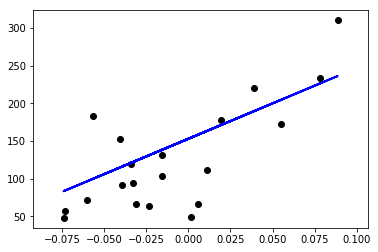

In [16]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes = datasets.load_diabetes()

# Use only one feature
diabetes_X = diabetes.data[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]
print("这里X是一维，能画出二维图象\ndiabetes_X_train:\n",diabetes_X_train[:5])
# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]
print("diabetes_y_train:\n", diabetes_y_train[:5])
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=2)

# plt.xticks(())
# plt.yticks(())

plt.show()

#### 第二种思路:脊回归

使 $ \min_{w} || Xw-y ||^2+\alpha ||w||^2 $ 最小即拟合

$ \alpha \geqslant 0 $ 是系数

In [18]:
from sklearn import linear_model
reg = linear_model.Ridge (alpha = .5)
reg.fit ([[0, 0], [0, 0], [1, 1]], [0, .1, 1]) 
print(reg)
print(reg.coef_)
print(reg.intercept_)

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)
[ 0.34545455  0.34545455]
0.136363636364


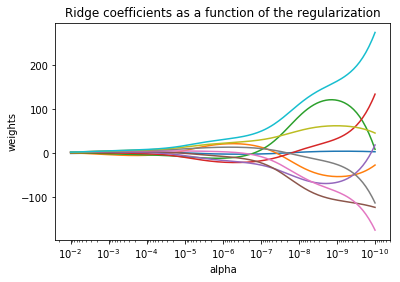

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

# X is the 10x10 Hilbert matrix
X = 1. / (np.arange(1, 11) + np.arange(0, 10)[:, np.newaxis])
y = np.ones(10)

###############################################################################
# Compute paths

n_alphas = 200
alphas = np.logspace(-10, -2, n_alphas)

coefs = []
for a in alphas:
    ridge = linear_model.Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)

###############################################################################
# Display results

ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

## 分类

### 逻辑回归

Logistic回归与多重线性回归实际上有很多相同之处，最大的区别就在于它们的因变量不同，其他的基本都差不多。正是因为如此，这两种回归可以归于同一个家族，即广义线性模型（generalizedlinear model）。

这一家族中的模型形式基本上都差不多，不同的就是因变量不同。

- 如果是连续的，就是多重线性回归；
- 如果是二项分布，就是Logistic回归；
- 如果是Poisson分布，就是Poisson回归；
- 如果是负二项分布，就是负二项回归。

Logistic回归的因变量可以是二分类的，也可以是多分类的，但是二分类的更为常用，也更加容易解释。所以实际中最常用的就是二分类的Logistic回归。

Logistic回归的主要用途：

- 寻找危险因素：寻找某一疾病的危险因素等；
- 预测：根据模型，预测在不同的自变量情况下，发生某病或某种情况的概率有多大；
- 判别：实际上跟预测有些类似，也是根据模型，判断某人属于某病或属于某种情况的概率有多大，也就是看一下这个人有多大的可能性是属于某病。

Logistic回归主要在流行病学中应用较多，比较常用的情形是探索某疾病的危险因素，根据危险因素预测某疾病发生的概率，等等。

例如，想探讨胃癌发生的危险因素，可以选择两组人群，一组是胃癌组，一组是非胃癌组，两组人群肯定有不同的体征和生活方式等。

这里的因变量就是是否胃癌，即“是”或“否”，自变量就可以包括很多了，例如年龄、性别、饮食习惯、幽门螺杆菌感染等。

自变量既可以是连续的，也可以是分类的。

#### 基本原理
Logistic Regression和Linear Regression的原理是相似的，按照我自己的理解，可以简单的描述为这样的过程：

（1）找一个`玄学的预测函数`（Andrew Ng的公开课中称为hypothesis），一般表示为h函数，该函数就是我们需要找的分类函数，它用来预测输入数据的判断结果。这个过程时非常关键的，需要对数据有一定的了解或分析，知道或者猜测预测函数的“大概”形式，比如是线性函数还是非线性函数。

（2）`构造损失函数`（也称Cost函数），该函数表示预测的输出（h）与训练数据类别（y）之间的偏差，可以是二者之间的差（h-y）或者是其他的形式。综合考虑所有训练数据的“损失”，将Cost求和或者求平均，记为`J(θ)函数`，表示所有训练数据预测值与实际类别的偏差。

（3）显然，J(θ)函数的值越小表示预测函数越准确（即h函数越准确），所以这一步需要做的是`找到J(θ)函数的最小值`。找函数的最小值有不同的方法，Logistic Regression实现时有的是梯度下降法（Gradient Descent）。

- 流程：玄学预测函数h --> 构造损失函数J(θ) --> 找到J(θ)函数的最小值(梯度下降法)

#### 具体过程

##### 构造预测函数

Logistic Regression虽然名字里带“回归”，但是它实际上是一种分类方法，用于两分类问题（即输出只有两种）。

根据第二章中的步骤，需要先找到一个预测函数（h），显然，该函数的输出必须是两个值（分别代表两个类别），所以利用了Logistic函数（或称为Sigmoid函数），函数形式为：
$$ g(z)=\frac{1}{1+e^{-z}} $$

![sigmoid(x)](sigmoid.jpg)

接下来需要确定数据划分的边界类型，对于图2和图3中的两种数据分布，显然图2需要一个线性的边界，而图3需要一个非线性的边界。

接下来我们只讨论线性边界的情况。

![线性边界](decisionBoundary.jpg)

![非线性边界](Non-DecisionBoundary.jpg)

对于线性边界的情况，边界形式如下：

$$ \theta_0+\theta_1 x_1+...+\theta_n x_n=\sum_{i=0}^{n}\theta_i x_i=\theta^T x$$

构造预测函数为：

$$ h_{\theta}(x)=g(\theta^T x)=\frac{1}{1+e^{-\theta^T x}} $$

$ h_θ(x) $函数的值有特殊的含义，它表示结果取1的概率，因此对于输入x分类结果为类别1和类别0的概率分别为：

$$ P(y=1|x;\theta)=h_{\theta}(x) $$
$$ P(y=0|x;\theta)=1-h_{\theta}(x) $$

##### 构造Cost函数

Andrew Ng在课程中直接给出了Cost函数及J(θ)函数如式（5）和（6），但是并没有给出具体的解释，只是说明了这个函数来衡量h函数预测的好坏是合理的。

$$ Cost(h_{\theta}(x), y)=
\left\{ 
\begin{array}{ll}
-log(h_\theta(x))&, y=1\\
-log(1-h_\theta(x))&,y=0
\end{array}
\right.  
$$
$$J(\theta)=\frac{1}{m}\sum_{i=1}^{m}Cost(h_{\theta}(x^{(i)}, y^{(i)})) $$

实际上这里的Cost函数和J(θ)函数是基于`最大似然估计`推导得到的。下面详细说明推导的过程。（4）式综合起来可以写成：

$$ P(y|x;\theta)=(h_{\theta}(x))^y (1-h_{\theta}(x))^{1-y} $$

取似然函数为：

$$ L(\theta)=\prod_{i=1}^{m}P(y^{i}|x^{(i)};\theta)=\prod_{i=1}^{m}(h_{\theta}(x))^y (1-h_{\theta}(x))^{1-y}$$

对数似然函数为：

$$ l(\theta)=logL(\theta)=\sum_{i=1}^{m}(y^{(i)}logh_{\theta}(x^{(i)})+(1-y^{(i)})log(1-h_{\theta}(x^{(i)}))) $$

最大似然估计就是要求得使l(θ)取最大值时的θ，其实这里可以使用梯度上升法求解，求得的θ就是要求的最佳参数。但是，在Andrew Ng的课程中将J(θ)取为（6）式，即：

$$ J(\theta)=-\frac{1}{m}l(\theta) $$

因为乘了一个负的系数-1/m，所以J(θ)取最小值时的θ为要求的最佳参数。

##### 梯度下降法求J(θ)的最小值

求J(θ)的最小值可以使用梯度下降法，根据梯度下降法可得θ的更新过程：

$$ \theta_j := \theta_j-\alpha \frac{\partial}{\partial \theta_j}J(\theta),(j=0...n) $$

式中为α学习步长，下面来求偏导：

$$
\begin{align}
\frac{\partial}{\partial \theta_j} J(\theta) 
&=-\frac{1}{m} \sum_{i=1}^{m} (y^{(i)}\frac{1}{h_{\theta}(x^{(i)})}\frac{\partial}{\partial\theta_j}h_{\theta}(x^{(i)})-(１-y^{(i)})\frac{1}{1-h_{\theta}(x^{(i)})}\frac{\partial}{\partial\theta_j}h_{\theta}(x^{(i)}) \\
&=-\frac{1}{m}\sum_{i=1}^{m}(y^{(i)}\frac{1}{g(\theta^T x^{(i)})}-(１-y^{(i)})\frac{1}{1-g(\theta^T x^{(i)})})\frac{\partial}{\partial\theta_j}g(\theta^T x^{(i)}) \\
&=-\frac{1}{m}\sum_{i=1}^{m}(y^{(i)}\frac{1}{g(\theta^T x^{(i)})}-(１-y^{(i)})\frac{1}{1-g(\theta^T x^{(i)})})g(\theta^T x^{(i)})(1-g(\theta^T x^{(i)}))\frac{\partial}{\partial\theta_j}\theta^T x^{(i)} \\
&=-\frac{1}{m}\sum_{i=1}^{m}(y^{(i)}(1-g(\theta^T x^{(i)}))-(１-y^{(i)})g(\theta^T x^{(i)}))x_{j}^{(i)} \\
&=-\frac{1}{m}\sum_{i=1}^{m}(y^{(i)}-g(\theta^T x^{(i)}))x_{j}^{(i)} \\
&=-\frac{1}{m}\sum_{i=1}^{m}(y^{(i)}-h_{\theta}(x^{(i)}))x_{j}^{(i)} \\
&=\frac{1}{m}\sum_{i=1}^{m}(h_{\theta}(x^{(i)})-y^{(i)})x_{j}^{(i)} 
\end{align}
$$

上式求解过程中用到如下的公式：

$$ f(x)=\frac{1}{1+e^{g(x)}} $$
$$
\begin{align}
\frac{\partial}{\partial x}f(x)
&=\frac{1}{(1+e^{g(x)})^2}e^{g(x)} \frac{\partial}{\partial x}g(x) \\
&=\frac{1}{1+e^{g(x)}}e^{g(x)} \frac{e^{g(x)}}{1+e^{g(x)}}e^{g(x)} \frac{\partial}{\partial x}g(x) \\
&=f(x)(1-f(x)) \frac{\partial}{\partial x}g(x) 
\end{align}
$$

因此，（11）式的更新过程可以写成：

$$ \theta_j := \theta_j-\alpha \frac{1}{m}\sum_{i=1}^{m}(h_{\theta}(x^{(i)})-y^{(i)})x_{j}^{(i)},(j=0...n) $$

因为式中α本来为一常量，所以 $ \frac{1}{m} $ 一般将省略，所以最终的θ更新过程为：

$$ \theta_j := \theta_j-\alpha \sum_{i=1}^{m} ( h_{\theta}(x^{(i)}) -y^{(i)} ) x_{j}^{(i)} , (j=0...n) $$

另外，补充一下，3.2节中提到求得l(θ)取最大值时的θ也是一样的，用梯度上升法求（9）式的最大值，可得：

$$
\begin{align}
\theta_j & := \theta_j+\alpha \frac{\partial}{\partial \theta_j}l(\theta)\\
&=\theta_j+\alpha \sum_{i=1}^{m} ( y^{(i)} - h_{\theta}(x^{(i)}) ) x_{j}^{(i)},(j=0...n) 
\end{align}
$$

观察上式发现跟（14）是一样的，所以，采用梯度上升发和梯度下降法是完全一样的，这也是《机器学习实战》中采用梯度上升法的原因。

##### 梯度下降过程向量化

关于θ更新过程的vectorization，Andrew Ng的课程中只是一带而过，没有具体的讲解。

《机器学习实战》连Cost函数及求梯度等都没有说明，所以更不可能说明vectorization了。

但是，其中给出的实现代码确是实现了vectorization的，图4所示代码的32行中weights（也就是θ）的更新只用了一行代码，直接通过矩阵或者向量计算更新，没有用for循环，说明确实实现了vectorization，具体代码下一章分析。

文献[3]中也提到了vectorization，但是也是比较粗略，很简单的给出vectorization的结果为：

$$ \theta_j := \theta_j-\alpha \sum_{i=1}^{m} ( h_{\theta}(x^{(i)}) -y^{(i)} ) x_{j}^{(i)} , (j=0...n) $$

且不论该更新公式正确与否，这里的Σ(...)是一个求和的过程，显然需要一个for语句循环m次，所以根本没有完全的实现vectorization，不像《机器学习实战》的代码中一条语句就可以完成θ的更新。

下面说明一下我理解《机器学习实战》中代码实现的vectorization过程。

约定训练数据的矩阵形式如下，x的每一行为一条训练样本，而每一列为不同的特称取值：

$$ x=
\begin{bmatrix}
x^{(1)} \\
x^{(2)} \\
... \\
x^{(m)} 
\end{bmatrix}
=
\begin{bmatrix}
x_0^{(1)} & x_1^{(1)} & ... & x_n^{(1)}\\
x_0^{(2)} & x_1^{(2)} & ... & x_n^{(2)}\\
... & ... & ... & ... \\
x_0^{(m)} & x_1^{(m)} & ... & x_n^{(m)}\\
\end{bmatrix},
y=
\begin{bmatrix}
y^{(1)} \\
y^{(2)} \\
... \\
y^{(m)} 
\end{bmatrix}
$$

约定待求的参数θ的矩阵形式为：

$$ \theta=
\begin{bmatrix}
\theta_0 \\
\theta_1 \\
... \\
\theta_n 
\end{bmatrix}
$$ 

先求x.θ并记为A：

$$ A=x\cdot\theta =
\begin{bmatrix}
x_0^{(1)} & x_1^{(1)} & ... & x_n^{(1)}\\
x_0^{(2)} & x_1^{(2)} & ... & x_n^{(2)}\\
... & ... & ... & ... \\
x_0^{(m)} & x_1^{(m)} & ... & x_n^{(m)}\\
\end{bmatrix}
\cdot
\begin{bmatrix}
\theta_0 \\
\theta_1 \\
... \\
\theta_n 
\end{bmatrix}
=
\begin{bmatrix}
\theta_0 x_0^{(1)} + \theta_1 x_1^{(1)} + ... + \theta_n x_n^{(1)}\\
\theta_0 x_0^{(2)} + \theta_1 x_1^{(2)} + ... + \theta_n x_n^{(2)}\\
... \\
\theta_0 x_0^{(m)} + \theta_1 x_1^{(m)} + ... + \theta_n x_n^{(m)}\\
\end{bmatrix}
$$
求hθ(x)-y并记为E：
$$ E=h_{\theta}(x)-y= 
\begin{bmatrix}
g(A^{(1)})-y^{(1)} \\
g(A^{(2)})-y^{(2)} \\
... \\
g(A^{(m)})-y^{(m)} 
\end{bmatrix}
=
\begin{bmatrix}
e^{(1)} \\
e^{(2)} \\
... \\
e^{(m)} 
\end{bmatrix}
=g(A)-y$$

g(A)的参数A为一列向量，所以实现g函数时要支持列向量作为参数，并返回列向量。由上式可知hθ(x)-y可以由g(A)-y一次计算求得。

再来看一下（15）式的θ更新过程，当j=0时：

$$ 
\begin{align}
\theta_0 
&:=\theta_0 - \alpha \sum_{i=1}^{m} ( h_{\theta}(x^{(i)}) -y^{(i)} ) x_{0}^{(i)} \\
&=\theta_0 - \alpha \sum_{i=1}^{m} e^{(i)} x_{0}^{(i)} \\
&=\theta_0 - \alpha \cdot (x_0^{(1)}, x_0^{(2)}, ... , x_0^{(m)}) \cdot E 
\end{align}
$$

同样的可以写出θj，

$$ \theta_j :=\theta_j - \alpha \cdot (x_j^{(1)}, x_j^{(2)}, ... , x_j^{(m)}) \cdot E  $$

综合起来就是：

$$ 
\begin{bmatrix}
\theta_0 \\
\theta_1 \\
... \\
\theta_n 
\end{bmatrix} :=
\begin{bmatrix}
\theta_0 \\
\theta_1 \\
... \\
\theta_n 
\end{bmatrix} - \alpha \cdot 
\begin{bmatrix}
x_0^{(1)} & x_0^{(2)} & ... & x_0^{(m)}\\
x_1^{(1)} & x_1^{(2)} & ... & x_1^{(m)}\\
... & ... & ... & ... \\
x_n^{(1)} & x_n^{(2)} & ... & x_n^{(m)}\\
\end{bmatrix} 
\cdot E = \theta-\alpha \cdot x^T \cdot E $$

综上所述，vectorization后θ更新的步骤如下：

（1）求$ A=x\cdot θ $；

（2）求$ E=g(A)-y $；

（3）求$ \theta := \theta-\alpha \cdot x^T \cdot E $,x'表示矩阵x的转置。

也可以综合起来写成：

$$ \theta := \theta-\alpha \cdot (\frac{1}{m})\cdot x^T \cdot (g(x\cdot\theta)-y) $$

前面已经提到过：$\frac{1}{m}$是可以省略的。

In [20]:
# 不用scikit-learn库实现
def sigmoid(x):
    return 1.0/(1+exp(-x))

def gradAscent(dataMatIn, classLabels):
    dataMatrix = mat(dataMatIn)
    labelMatrix= mat(classLabels).transpose()
    m, n = shape(dataMatrix)
    alpha = 0.001
    maxCycles = 500
    weights = ones((n, 1))
    for k in range(maxCycles):
        h = sigmoid(dataMatrix*weights)
        error = (labelMatrix - h)
        weights = weights + alpha * dataMatrix.transpose() * error
        return weights

#### 正则化Regularization

##### 过拟合问题

对于线性回归或逻辑回归的损失函数构成的模型，可能会有些权重很大，有些权重很小，导致过拟合（就是过分拟合了训练数据），使得模型的复杂度提高，泛化能力较差（对未知数据的预测能力）。

下面左图即为欠拟合，中图为合适的拟合，右图为过拟合。

![overfitting](overfitting.png)

##### 问题的主因

过拟合问题往往源自过多的特征。

##### 解决方法

1）减少特征数量（减少特征会失去一些信息，即使特征选的很好）

- 可用人工选择要保留的特征；

- 模型选择算法；

2）正则化（特征较多时比较有效）

- 保留所有特征，但减少θ的大小

##### 正则化方法

正则化是结构风险最小化策略的实现，是在经验风险上加一个正则化项或惩罚项。

正则化项一般是模型复杂度的单调递增函数，模型越复杂，正则化项就越大。

从房价预测问题开始，这次采用的是多项式回归。左图是适当拟合，右图是过拟合。

![fitting](fitting.png)

直观来看，如果我们想解决这个例子中的过拟合问题，最好能将$ x^3,x^4 $的影响消除，也就是让$ \theta_3\to 0, \theta_4\to 0 $。假设我们对$ \theta_3,\theta_4 $进行惩罚，并且令其很小，一个简单的办法就是给原有的Cost函数加上两个略大惩罚项，例如：

$$ \min_{\theta}^{ } \frac{1}{2m} \sum_{i=1}^{n} (h_{\theta}(x_i) - y_i)^2 + 1000 \theta_3 ^2 + 1000 \theta_4 ^2 ) $$

这样在最小化Cost函数的时候，$ \theta_3\to 0,\theta_4\to 0 $

正则项可以取不同的形式，在回归问题中取平方损失，就是参数的L2范数，也可以取L1范数。取平方损失时，模型的损失函数变为：

$$ J(\theta) = \frac{1}{2m} \sum_{i=1}^{n} (h_{\theta}(x_i) - y_i)^2 + \lambda \sum_{j=1}^{n} \theta_j^2 $$

lambda是正则项系数：

- 如果它的值很大，说明对模型的复杂度惩罚大，对拟合数据的损失惩罚小，这样它就不会过分拟合数据，在训练数据上的偏差较大，在未知数据上的方差较小，但是可能出现欠拟合的现象；

- 如果它的值很小，说明比较注重对训练数据的拟合，在训练数据上的偏差会小，但是可能会导致过拟合。

正则化后的梯度下降算法θ的更新变为：

$$ \theta_j := \theta_j \frac{\alpha}{m} \sum_{i=1}^{n} (h_{\theta} (x_i) - y_i) x_{i}^{j} - \frac{\lambda}{m} \theta_j $$

正则化后的线性回归的Normal Equation的公式为：

$$ \theta=(X^T X+\lambda 
\begin{bmatrix}
0 & & & \\
& 1 & & \\
& & ... & \\
& & & 1 \\
\end{bmatrix})^{-1} X_T Y $$

##### 其他优化算法

- Conjugate gradient method(共轭梯度法)

- Quasi-Newton method(拟牛顿法)

- BFGS method

- L-BFGS(Limited-memory BFGS)

后二者由拟牛顿法引申出来，与梯度下降算法相比，这些算法的优点是：

- 第一，不需要手动的选择步长；

- 第二，通常比梯度下降算法快；

但是缺点是更复杂。

#### 多类分类问题

对于多类分类问题，可以将其看做成二类分类问题：保留其中的一类，剩下的作为另一类。

对于每一个类 i 训练一个逻辑回归模型的分类器$ h_{\theta}^{(i)}(x) $，并且预测y = i时的概率；对于一个新的输入变量x, 分别对每一个类进行预测，取概率最大的那个类作为分类结果：$$ \max_{i} h_{\theta}^{(i)}(x) $$

C=100.00
Sparsity with L1 penalty: 6.25%
score with L1 penalty: 0.9104
Sparsity with L2 penalty: 4.69%
score with L2 penalty: 0.9098
C=1.00
Sparsity with L1 penalty: 9.38%
score with L1 penalty: 0.9110
Sparsity with L2 penalty: 4.69%
score with L2 penalty: 0.9093
C=0.01
Sparsity with L1 penalty: 85.94%
score with L1 penalty: 0.8631
Sparsity with L2 penalty: 4.69%
score with L2 penalty: 0.8915


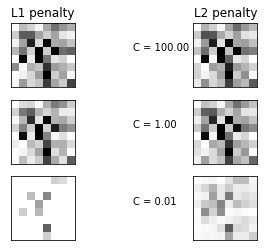

In [21]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

digits = datasets.load_digits()

X, y = digits.data, digits.target
X = StandardScaler().fit_transform(X)

# classify small against large digits
y = (y > 4).astype(np.int)


# Set regularization parameter
for i, C in enumerate((100, 1, 0.01)):
    # turn down tolerance for short training time
    clf_l1_LR = LogisticRegression(C=C, penalty='l1', tol=0.01)
    clf_l2_LR = LogisticRegression(C=C, penalty='l2', tol=0.01)
    clf_l1_LR.fit(X, y)
    clf_l2_LR.fit(X, y)

    coef_l1_LR = clf_l1_LR.coef_.ravel()
    coef_l2_LR = clf_l2_LR.coef_.ravel()

    # coef_l1_LR contains zeros due to the
    # L1 sparsity inducing norm

    sparsity_l1_LR = np.mean(coef_l1_LR == 0) * 100
    sparsity_l2_LR = np.mean(coef_l2_LR == 0) * 100

    print("C=%.2f" % C)
    print("Sparsity with L1 penalty: %.2f%%" % sparsity_l1_LR)
    print("score with L1 penalty: %.4f" % clf_l1_LR.score(X, y))
    print("Sparsity with L2 penalty: %.2f%%" % sparsity_l2_LR)
    print("score with L2 penalty: %.4f" % clf_l2_LR.score(X, y))

    l1_plot = plt.subplot(3, 2, 2 * i + 1)
    l2_plot = plt.subplot(3, 2, 2 * (i + 1))
    if i == 0:
        l1_plot.set_title("L1 penalty")
        l2_plot.set_title("L2 penalty")

    l1_plot.imshow(np.abs(coef_l1_LR.reshape(8, 8)), interpolation='nearest',
                   cmap='binary', vmax=1, vmin=0)
    l2_plot.imshow(np.abs(coef_l2_LR.reshape(8, 8)), interpolation='nearest',
                   cmap='binary', vmax=1, vmin=0)
    plt.text(-8, 3, "C = %.2f" % C)

    l1_plot.set_xticks(())
    l1_plot.set_yticks(())
    l2_plot.set_xticks(())
    l2_plot.set_yticks(())

plt.show()

In [ ]:
import time
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import fetch_mldata
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state

# Turn down for faster convergence
t0 = time.time()
train_samples = 5000

mnist = fetch_mldata('MNIST original')
X = mnist.data.astype('float64')
y = mnist.target
random_state = check_random_state(0)
permutation = random_state.permutation(X.shape[0])
X = X[permutation]
y = y[permutation]
X = X.reshape((X.shape[0], -1))

X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=train_samples, test_size=10000)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Turn up tolerance for faster convergence
clf = LogisticRegression(C=50 / train_samples,
                         multi_class='multinomial',
                         penalty='l1', solver='saga', tol=0.1)
clf.fit(X_train, y_train)
sparsity = np.mean(clf.coef_ == 0) * 100
score = clf.score(X_test, y_test)
# print('Best C % .4f' % clf.C_)
print("Sparsity with L1 penalty: %.2f%%" % sparsity)
print("Test score with L1 penalty: %.4f" % score)

coef = clf.coef_.copy()
plt.figure(figsize=(10, 5))
scale = np.abs(coef).max()
for i in range(10):
    l1_plot = plt.subplot(2, 5, i + 1)
    l1_plot.imshow(coef[i].reshape(28, 28), interpolation='nearest',
                   cmap=plt.cm.RdBu, vmin=-scale, vmax=scale)
    l1_plot.set_xticks(())
    l1_plot.set_yticks(())
    l1_plot.set_xlabel('Class %i' % i)
plt.suptitle('Classification vector for...')

run_time = time.time() - t0
print('Example run in %.3f s' % run_time)
plt.show()

### 支持向量机SVM(support vector machine)

#### 感知机(Perceptron)

感知机是一个非常简单的模型，在它的基础上发展出支持向量机（修改一下损失函数）和神经网络（经过简单的堆叠）

我们先从感知机开始．

为了便于理解，我们统一讨论二分类问题，并将两个类别的样本分别称为正｜负样本．

当然，由二分类问题的推广之后会提到．

##### 感知机能做什么

感知机能且一定能将线性可分的数据集合分开

`线性可分`:
- 在二维平面上，线性可分指存在一条线，将正负样本分开；
- 在三维空间中，线性可分指存在一个平面，将正负样本分开；
- 在高维空间$R^n$中，线性可分指存在一个n-1维的超平面，将正负样本分开

感知机 在`线性可分`的数据集的表现

![在线性可分的数据集的表现0](svm1.gif)
![在线性可分的数据集的表现1](svm2.gif)


感知机 在`线性不可分`的数据集的表现

![在线性可分的数据集的表现0](svm3.gif)
![在线性可分的数据集的表现1](svm4.gif)

数学定义线性可分的概念如下：

1.先定义超平面

玄学地设有一个＂超平面＂

$$ \Pi : w\cdot x +b=0 $$

其中，$w$是n维行向量，$x$是n维列向量，b是常数，则$\Pi$是$R^n$的超平面．

对二维平面来说n=2，此时

$$ w=\begin{bmatrix}w_1 w_2\end{bmatrix}, x=\begin{bmatrix} x_1 \\ x_2 \end{bmatrix} \\ \Pi:w_1 x_1 + w_2 x_2 + b = 0$$

这是平面坐标系中的直线的一般方程

2.再定义线性可分

对于一个数据集 $ D={(x_1,y_1),...,(x_N,y_N)} $ ($x_i$为输入，$y_i$为标签且只取$\pm 1$)

若存在一个超平面$\Pi$能将$D$中的正负样本分开（对某个样本$(x_i,y_i)$，若$y_i=1$，则称其为正样本；若$y_i=-1$，则称其为负样本）

则称$D$是线性可分的，否则就是线性不可分的．

- 事实上，感知机模型只有$w,b$两个参数（x是输入），我们要做的是根据一定的算法，挖掘样本信息，逐步更新$w,b$，从而使对应的超平面$\Pi$将$D$分开

##### 感知机模型

反正要更新$w,b$，不妨初始化分别设$w,b$为零向量，0

广泛地，用梯度下降法来更新．梯度下降法包含两步：

- 弄出一个损失函数，求损失函数的梯度（求导）
- 让$w,b$往梯度反方向更新（梯度是函数增长最快的方向，要最小化损失函数，就是要让函数值减少得最快，即往梯度反方向更新）

##### 损失函数

注意到我们的感知机对应的超平面$ \Pi : w\cdot x +b=0 $，一个自然的想法就是：

$$(x,y)是正样本\Leftrightarrow w\cdot x +b>0 \Leftrightarrow y=1 \Leftrightarrow (x,1)在\Pi 的上方 $$
$$(x,y)是负样本\Leftrightarrow w\cdot x +b<0 \Leftrightarrow y=-1 \Leftrightarrow (x,-1)在\Pi 的下方$$

设第i步更新的$w,b$分别为$w_i,b_i$，$w,b$最终稳定在$w_N,b_N$，则第i步的损失函数$L(x,y)$可以定义为：

$$ 若w_i\cdot x +b_i>0，则L(x,1)=0,\,\, L(x,-1)=w_i\cdot x +b_i - (w_N\cdot x + b_N) = w_i\cdot x +b_i - 0 = w_i\cdot x +b_i $$
$$ 若w_i\cdot x +b_i<0，则L(x,-1)=0,\,\, L(x,1)=-w_i\cdot x +b_i - (w_N\cdot x + b_N) = -w_i\cdot x +b_i - 0 = -w_i\cdot x +b_i $$

为了照顾数学家的强迫症，设$　y=1　当 w_i\cdot x +b_i>0;　y=-1　当 w_i\cdot x +b_i<0 (即　y　和　w_i\cdot x +b_i　同号)$

就可以简化为：

- 损失函数：$ L(x,y)=max(-y(w_i\cdot x +b_i),0) $
- (x,y)被正确分类$ \Leftrightarrow y(w_i\cdot x +b_i )>0 $

从而易知：只有错分类的点才会给L(x,y)贡献梯度　(　分类正确的点的L(x,y)=0，梯度为0　)

所以训练感知机时,我们只需选择使损失函数 $ L(x,y) $ 最大的一个样本 $ (x_i,y_i) $ ，用它来计算梯度，然后梯度下降即可

有意思的是，如果所有的$(x_i,y_i)$都被正确分类了，则损失函数 $ L(x,y)==0 $，此时模型训练不动了，$w_i,b_i$不更新了

##### 梯度下降

- 求梯度

$$ L(x_i,y_i)=-y_i(w_{i-1}\cdot x_i+b_{i-1})=-w_{i-1}\cdot x_i y_i - y_ib_{i-1} 　（y_i=\pm 1）$$
$$ \frac{\partial L}{\partial w_{i-1}}=-x_i y_i \,\, , \,\, \frac{\partial L}{\partial b_{i-1}}=-y_i $$

- 更新$w_i,b_i$

$$ w_i := w_{i-1}+x_i y_i $$
$$ b_i := b_{i-1}+y_i $$

下面给出感知机模型的一个实现并进行测试

###### 感知机的实现．测试．可视化

In [3]:
import numpy as np
# 感知机模型
class Perceptron:
    def __init__(self):
        self._w = self._b = None
        
    def fit(self, x, y, lr=0.01, epoch=1000):
        x, y = np.asarray(x, np.float32), np.asarray(y, np.float32)
        self._w = np.zeros(x.shape[1])
        self._b = 0.
        # 训练感知机　**关键代码**
        for _ in range(epoch):
            # 计算 w·x+b
            y_pred = x.dot(self._w) + self._b
            # 选出使得损失函数最大的样本
            idx = np.argmax(np.maximum(0, -y_pred * y))
            # 若该样本被正确分类，则结束训练
            if y[idx] * y_pred[idx] > 0:
                break
            # 否则，让参数沿着负梯度方向走一步
            delta = lr * y[idx]
            self._w += delta * x[idx]
            self._b += delta
    
    def predict(self, x, raw=False):
        x = np.asarray(x, np.float32)
        y_pred = x.dot(self._w) + self._b
        if raw:
            return y_pred
        return np.sign(y_pred).astype(np.float32)


In [4]:
from Util import gen_two_clusters

x, y = gen_two_clusters()
perceptron = Perceptron()
perceptron.fit(x, y)
print("准确率：{:8.6} %".format((perceptron.predict(x) == y).mean() * 100))

准确率：   100.0 %


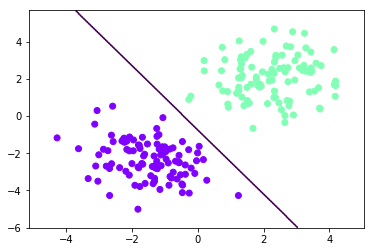

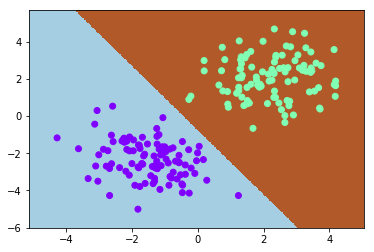

In [5]:
from Util import visualize2d

visualize2d(perceptron, x, y)
visualize2d(perceptron, x, y, True)

##### *线性可分性相关数学理论

从数学的角度来说，线性可分性还有一个比较直观的等价定义：正负样本点集的凸包彼此不交。

所谓凸包的定义如下：若集合$ S\subset\mathbb{R}^n $ 由N个点组成：

$$ S={x_1,...,x_N}\\ (x_i\in\mathbb{R}^n,\forall i=1,...,N) $$

那么S的凸包 $ \text{conv}(S) $ 即为：

 $$ \text{conv}(S)=\left\{ x=\sum_{i=1}^N\lambda_ix_i|\sum_{i=1}^N\lambda_i=1,\lambda_i\ge0\ (i=1,...,N) \right\}
 $$ 
比如，上文给出过的两个二维数据集的凸包将如下图所示：

![凸包](svm5.jpg)

左图正负样本点集的凸包不交、所以数据集线性可分，右图的橙色区域即为正负样本点集凸包的相交处、所以数据集线性不可分

该等价性的证明可以用反证法得出：

###### 1）线性可分 $ \Rightarrow $ 凸包不交：

线性可分意味着存在 $ w^* $ 和 $ b^* $ ，使得 $ y(w^*\cdot x+b^*)>0 $ 对任意 $ (x,y)\in D $ 成立。

如果凸包相交的话，就意味着存在某个样本 $ (x^*,y^*) $ 、使得 $ x^* $ 既是正样本输入数据的线性组合、又是负样本输入数据的线性组合：

 $$ x^*=\sum_{y_i=1}{\lambda_ix_i}=\sum_{y_i=-1}{\mu_ix_i} $$ 

从而

 $$ y^*(w^*\cdot x^*+b^*)=y^*\left(w^*\cdot\sum_{y_i=1}{\lambda_ix_i+b^*}\right)=y^*\left(w^*\cdot\sum_{y_i=-1}{\mu_ix_i+b^*}\right)>0（式 1） $$ 

注意到

 $$ y_i=1时，w^*\cdot x_i+b^*>0 $$ 
 $$ y_i=-1时，w^*\cdot x_i+b^*<0 $$ 
 
所以（注意由凸包的定义我们有 $ \sum_i\lambda_i=\sum_i\mu_i=1且\lambda_i\ge0,\mu_i\ge0 $ ）

 $$ w^*\cdot\sum_{y_i=1}{\lambda_ix_i+b^*}=\sum_{y_i=1}{\lambda_i\left(w^*\cdot x_i+b^*\right)}>0 $$ 

 $$ w^*\cdot\sum_{y_i=-1}{\mu_ix_i+b^*}=\sum_{y_i=-1}{\mu_i\left(w^*\cdot x_i+b^*\right)}<0 $$ 

这与式 1 矛盾

###### 2）凸包不交 $ \Rightarrow $ 线性可分：

严谨证明需要用到一些奇怪的东西，这里就只提供一个（非常）不严谨的直观说明（欢迎观众老爷们提供更好的证明，现在这个说明我看上去觉得很像是错的）（喂）：

在正样本点集凸包的边界上取一个离负样本点集凸包“最近”的点 $ x^{*(1)} $ 并假设负样本点集凸包边界上离 $ x^{*(1)} $ “最近”的点为 $ x^{*(2)} $ 。

过 $ x^{*(1)} $ 画一个超平面 $ \Pi:w^*\cdot x+b^*=0 $ 、使得 $ \Pi $ 与 $ x^{*(1)} $ 、 $ x^{*(2)} $ 的连线垂直。

由凸包的几何性质可知此时（除了 $ x^{*(1)}外 $ ）正样本点集都被分到了 $ \Pi $ 的同一侧、且 $ x^{*(2)} $ 是离 $ \Pi $ “最近”的点，这样只需把 $ \Pi $ 稍微往负样本点集那边挪一点（什么鬼！）就行了

然后是前文遗留下来的、感知机模型收敛性的证明。

我们知道感知机对应的超平面为：

 $$ \Pi:w\cdot x+b=0 $$ 

将其展开的话、就是

 $$ \Pi:w_1x_1+...+w_nx_n+b=0 $$ 

所以我们可以将其改写为

 $$ \Pi:\hat w\cdot \hat x=0 $$ 

其中

 $$ \hat w=(w_1,...,w_n,b),\hat x=(x_1,...,x_n,1) $$ 

如果数据集线性可分的话，就意味着存在 $ \hat w^* $ 、使得对任意 $ (x,y)\in D $ 、都有 $ y(\hat w^*\cdot \hat x)>0 $ ；注意到 $ \hat w^* $ 的  $ scale  $ 不影响超平面、所以我们不妨假设 $ \|w^*\|=1 $ 。同时由于数据集D中的样本是有限的，所以这又意味着 $ \exists\gamma,\Delta $ 、使得总有 $ y(\hat w^*\cdot\hat x^*)\ge\gamma,\|x_i\|^2\le\Delta $ 

现在我们初始化 $ \hat w $ 为 0 向量（ $ \hat w_0 = \textbf{0} $ ），并开始感知机模型的训练（假设现在是第k步）：



1）假设 $ \Pi_k:\hat w_k\cdot\hat x=0 $ 已经将所有样本正确分类，则已证毕

2）否则，取被 $ \Pi_k $ 误分类的样本 $ (x_i,y_i) $ ，进行参数的更新： $ \hat w_{k+1}=\hat w_k+\eta y_i\cdot\hat x_i $ 。由此易知（注意 $ \hat w_0 = \textbf{0} $ ）：

 $$ \begin{align} \hat w^*\cdot \hat w_{k+1}&=\hat w^*\cdot \hat w_k+\eta y_i(\hat w^*\cdot \hat x_i)\ge\hat w^*\cdot \hat w_k+\eta\gamma \\ &\ge...\ge\hat w^*\cdot \hat w_0+(k+1)\eta\gamma=(k+1)\eta\gamma \end{align}
 $$ 
且

 $$ \|\hat w^*\|^2\cdot\|\hat w_{k+1}\|^2=\|\hat w_{k+1}\|^2=\|\hat w_k\|^2+2\eta y_i(\hat w_k\cdot\hat x_i)+\eta^2y_i^2(\hat x_i\cdot\hat x_i)（式 2） $$ 

注意 $ (x_i,y_i) $ 是被误分类的、且 $ y_i $ 只能取 $ \pm 1 $ ，所以 $ y_i(\hat w_k\cdot\hat x_i)\le0、y_i^2=1 $ ，从而由 $ 式 2  $ 可以推出：

 $$ \begin{align} \|\hat w^*\|^2\cdot\|\hat w_{k+1}\|^2&\le\|\hat w_k\|^2+\eta^2\|x_i\|^2\le\|\hat w_k\|^2+\eta^2\Delta \\ &\le...\le\|\hat w_0\|^2+(k+1)\eta^2\Delta=(k+1)\eta^2\Delta \end{align} $$ 

从而

 $$ \begin{align} &\left[(k+1)\eta\gamma\right]^2\le(\hat w^*\cdot\hat w_{k+1})^2\le\|\hat w^*\|^2\cdot\|\hat w_{k+1}\|^2\le(k+1)\eta^2\Delta \\ &\Rightarrow k+1\le\frac\Delta{\gamma^2} \end{align} $$ 

亦即训练步数k是有上界的，这意味着收敛性。而且 $ \frac\Delta{\gamma^2} $ 中不含学习速率 $ \eta $ ，这说明对感知机模型来说、学习速率不会影响收敛性

##### *拉格朗日对偶性（Lagrange Duality）

最后简单介绍一个非常重要的概念：拉格朗日对偶性（Lagrange Duality）。

我们在前三小节介绍的感知机算法，其实可以称为“感知机的原始算法”；而利用拉格朗日对偶性，我们可以得到感知机算法的对偶形式。

鉴于拉格朗日对偶性的原始形式太过纯数学，所以我打算结合具体的算法来介绍、而不打算叙述其原始形式，感兴趣的观众老爷可以参见[这里](https://en.wikipedia.org/wiki/Duality_(optimization))

在有约束的最优化问题中，为了便于求解、我们常常会利用它来将比较原始问题转化为更好解决的对偶问题。

对于特定的问题，原始算法的对偶形式也常常会有一些共性存在。

比如对于感知机和后文会介绍的支持向量机来说，它们的对偶算法都会将模型的参数表示为样本点的某种线性组合、并把问题转化为求解线性组合中的各个系数

虽说感知机算法的原始形式已经非常简单，但是通过将它转化为对偶形式、我们可以比较清晰地感受到转化的过程，这有助于理解和记忆后文介绍的、较为复杂的支持向量机的对偶形式

考虑到原始算法的核心步骤为：

 $$ w\leftarrow w+\eta y_ix_i $$

 $$ b\leftarrow b+\eta y_i $$ 

其中 $ (x_i,y_i)\in E、E $ 是当前被误分类的样本点的集合；可以看见、参数的更新是完全基于样本点的。考虑到我们要将参数$w和b$表示为样本点的线性组合，一个自然的想法就是记录下在核心步骤中、各个样本点分别被利用了多少次、然后利用这个次数来将$w和b$表示出来。比如说，若设样本点$(x_i,y_i)$一共在上述核心步骤中被利用了$ n_i $次、那么就有（假设初始化参数时$ w=(0,...,0)^T\in \mathbb{R}^n,b=0 $ ）：

 $$ w = \eta\sum_{i=1}^N{n_iy_ix_i} $$ 

 $$ b=\eta\sum_{i=1}^N{n_iy_i} $$ 

如果进一步设$ \alpha_i=\eta n_i $，则有：

$$ w = \sum_{i=1}^N{\alpha_iy_ix_i}$$

$$ b=\sum_{i=1}^N{\alpha_iy_i}$$

此即感知机模型的对偶形式。

需要指出的是，在对偶形式中、样本点里面的$x$仅以内积的形式$（x_i\cdot x_j）$出现；这是一个非常重要且深刻的性质，利用它和后文将进行介绍的核技巧、能够将许多算法从线性算法“升级”成为非线性算法

注意到对偶形式的训练过程常常会重复用到大量的、样本点之间的内积，我们通常会提前将样本点两两之间的内积计算出来并存储在一个矩阵中；这个矩阵就是著名的 Gram 矩阵、其数学定义即为：

$$G=(x_i\cdot x_j)_{N\times N}$$

从而在训练过程中如果要用到相应的内积、只需从 Gram 矩阵中提取即可，这样在大多数情况下都能大大提高效率

#### LinearSVM

很多人（包括我）第一次听说 SVM 时都觉得它是个非常厉害的东西，但其实 SVM 本身“只是”一个线性模型。只有在应用了核方法后，SVM 才会“升级”成为一个非线性模型

不过由于普遍说起 SVM 时我们都默认它带核方法，所以我们还是随大流、称 SVM 的原始版本为 LinearSVM。不过即使“只是”线性模型，这个“只是”也是要打双引号的——它依旧强大，且在许许多多的问题上甚至要比带核方法的 SVM 要好（比如文本分类）

LinearSVM 往简单来说其实就只是改了感知机的损失函数而已，而且改完之后还很像

##### 感知机的问题与 LinearSVM 的解决方案

由感知机损失函数的形式可知，感知机只要求样本被正确分类，而不要求样本被“很好地正确分类”。这就导致感知机弄出来的超平面（通常又称“决策面”）经常会“看上去很不舒服”：

![](svm8.png)

之所以看上去很不舒服，是因为决策面离两坨样本都太近了。从直观上来说，我们希望得到的是这样的决策面：

![](svm9.png)

（之所以画风突变是因为 matplotlib 的默认画风变了，然后我懒得改了……）（喂

那么应该如何将这种理想的决策面的状态翻译成机器能够学习的东西呢？直观来说，就是让决策面离正负样本点的间隔都尽可能大；而这个“间隔”翻译成数学语言，其实就是简单的：

 $$  d((x,y),\Pi)=\frac {1}{\|w\|}y(w\cdot x+b)（文末会给出相应说明） $$ 

在有了样本点到决策面的间隔后，数据集到决策面的间隔也就好定义了：

 $$ d(D, \Pi)=\min_{(x,y)\in D}d((x,y),\Pi) $$
所以我们现在的目的就转化为：

- 让所有样本点都被正确分类： $ y(w\cdot x+b)>0,\forall(x,y)\in D $ 

- 让决策面离正负样本点的间隔都尽可能大： $ \max\min_{(x,y)\in D}\frac {1}{\|w\|}y(w\cdot x+b) $ 

注意到 $ y(w\cdot x+b)>0 $ 的性质和 $ \frac {1}{\|w\|}y(w\cdot x+b) $ 的值在 $ w $ 和 $ b $ 同时扩大  $ k  $ 倍时不会改变，所以我们完全可以假设：

$$
若 (x^*,y^*)=\arg\min_{(x,y)\in D}\frac {1}{\|w\|}y(w\cdot x+b)  ，则  y^*(w\cdot x^*+b)=1
$$
$$
（否则假设  y^*(w\cdot x^*+b)=c  ，令  w\leftarrow\frac{ w}{c},b\leftarrow\frac{ b}{c} 即可）
$$

注意由于 $ (x^*,y^*)=\arg\min_{(x,y)\in D}\frac {1}{\|w\|}y(w\cdot x+b) $ 这个最小化过程中$w$是固定的，所以我们可以把 $ \frac1{\|w\|} $ 这一项拿掉，从而：

$$ (x^*,y^*)=\arg\min_{(x,y)\in D}y(w\cdot x+b) $$

所以 $ y^*(w\cdot x^*+b)=1\Rightarrow y(w\cdot x+b)\ge1,\forall(x,y)\in D $

于是优化问题转为：

$$ \max_{w,b}\frac {1}{\|w\|}，使得y_i(w\cdot x_i+b)\ge1,\forall(x_i,y_i)\in D $$

亦即

$$ \min_{w,b}\frac {\|w\|^2}2，使得y_i(w\cdot x_i+b)\ge1,\forall(x_i,y_i)\in D $$

但是这会导致另一个问题：当数据集线性不可分时，上述优化问题是必定无解的，这就会导致模型震荡（换句话说， $ y_i(w\cdot x_i+b)\ge1 $ 这个约束太“硬”了）。

所以为了让模型在线性不可分的数据上仍有不错的表现，从直观来说，我们应该“放松”对我们模型的限制（让我们模型的约束“软”一点）：

$$ \min_{w,b}\frac {\|w\|^2}2，使得y_i(w\cdot x_i+b)\ge1-\xi_i,\forall(x_i,y_i)\in D $$
其中$\xi_i\ge0$。当然仅仅放松限制会使模型变得怠惰（咦），所以我们还需要让这种放松受到惩罚：

$$\min_{w,b}\left[\frac {\|w\|^2}2+C\sum_{i=1}^N\xi_i\right]，使得y_i(w\cdot x_i+b)\ge1-\xi_i,\forall(x_i,y_i)\in D（\xi_i\ge0）$$

其中$C$是一个常数，可以把它理解为“惩罚力度”（这样做的合理性会在文末给出）。

若假设数据集为 $ D=\left\{(x_1,y_1),...,(x_N,y_N)\right\} $ 的话，那么经过数学变换后，可知上述优化问题等价于（文末会给出过程）：

$$\min_{w,b}{\left[\frac{\|w\|^2}2 + C\sum_{i=1}^N[1-y_i(w\cdot x_i+b)]_+\right]}$$

其中“ $ [ \cdot ]_+ $ ”其实就是 ReLU 函数：
$$
[x]_+=\left\{
\begin{aligned}
0&\ ,\ x\le0 \\
x&\ ,\ x>0
\end{aligned}
\right.
$$

注意我们感知机的损失函数为 $ \sum_{i=1}^N[-y(w\cdot x+b)]_+ $ ，于是综上所述可以看出，LinearSVM 在形式上和感知机的差别只在于损失函数、且这两个损失函数确实长得很像

##### LinearSVM 的训练

【虽然比较简单，但是调优 LinearSVM 的训练这个过程是相当有启发性的事情。仍然是那句老话：麻雀虽小，五脏俱全。我们会先展示“极大梯度下降法”的有效性，然后会展示极大梯度下降法存在的问题，最后则会介绍如何应用 Mini-Batch 梯度下降法（MBGD）来进行训练】

为了使用梯度下降法，我们需要先求导。我们已知：

$$L(D)=\frac{\|w\|^2}2 + C\sum_{i=1}^N[1-y_i(w\cdot x_i+b)]_+$$
所以我们可以认为：

$$L(x,y)=\frac{\|w\|^2}2+C[1-y(w\cdot x+b)]_+$$
于是：

- $$当 y(w\cdot x+b)\ge1 时： \frac{\partial L(x,y)}{\partial w} = w、\frac{\partial L(x,y)}{\partial b}=0 $$


- $$当 y(w\cdot x+b)<1  时：  \frac{\partial L(x,y)}{\partial w} = w-Cyx、\frac{\partial L(x,y)}{\partial b}=-Cy $$ 


所以我们可以把极大梯度下降的形式写成（假设学习速率为 $ \eta $ ）：

$$w\leftarrow (1-\eta)w$$

若 $ y(w\cdot x+b)<1 $ ，则选出某个被错分的样本(x,y)，然后：

 $$ w\leftarrow w+\eta Cyx $$ 
 $$ b\leftarrow b+\eta Cy $$ 

我们完全可以照搬感知机里的代码来完成实现（由于思路基本一致，这里就略去注释了）：

In [6]:
import numpy as np

class LinearSVM:
    def __init__(self):
        self._w = self._b = None
        
    def fit(self, x, y, c=1, lr=0.01, epoch=10000):
        x, y = np.asarray(x, np.float32), np.asarray(y, np.float32)
        self._w = np.zeros(x.shape[1])
        self._b = 0.
        for _ in range(epoch):
            self._w *= 1 - lr
            err = 1 - y * self.predict(x, True)
            idx = np.argmax(err)
            # 注意即使所有 x, y 都满足 w·x + b >= 1
            # 由于损失里面有一个 w 的模长平方
            # 所以仍然不能终止训练，只能截断当前的梯度下降
            if err[idx] <= 0:
                break
            delta = lr * c * y[idx]
            self._w += delta * x[idx]
            self._b += delta
    
    def predict(self, x, raw=False):
        x = np.asarray(x, np.float32)
        y_pred = x.dot(self._w) + self._b
        if raw:
            return y_pred
        return np.sign(y_pred).astype(np.float32)


下面这张动图是该 LinearSVM 的训练过程：
![LinearSVM](https://cdn.rawgit.com/carefree0910/Resources/f0978da2/Lines/LinearSVM.gif)

![LinearSVM](https://cdn.rawgit.com/carefree0910/Resources/f0978da2/Backgrounds/LinearSVM.gif)

虽然看上去不错，但仍然存在着问题：

- 训练过程其实非常不稳定
- 从直观上来说，由于 LinearSVM 的损失函数比感知机要更复杂，所以相应的函数形状也会更复杂。这意味着当数据集稍微差一点的时候，直接单纯地应用极大梯度下降法可能会导致一些问题——比如说模型会卡在某个很奇怪的地方无法自拔（什么鬼）

通过将正负样本点的“中心”从原点 (0, 0)（默认值）挪到 (5, 5)（亦即破坏了一定的对称性）并将正负样本点之间的距离拉近一点，我们可以复现这个问题：

![Failure of LinearSVM][1]

原理我不敢乱说，这里只提供一个牵强附会的直观解释：

- 每次只取使得损失函数极大的一个样本进行梯度下降\rightarrow模型在某个地方可能来来回回都只受那么几个样本的影响\rightarrow死循环（什么鬼！）

专业的理论就留待专业的观众老爷补充吧 ( σ'ω')σ

然后解决方案的话，主要还是从改进随机梯度下降（SGD）的思路入手（因为极大梯度下降法其实就是 SGD 的特殊形式）。

我们知道 SGD 的“升级版”是 MBGD、亦即拿随机 Mini-Batch 代替随机抽样，我们这里也完全可以依样画葫芦。

以下是对应代码（只显示出了核心部分）：

[1]: https://cdn.rawgit.com/carefree0910/Resources/83441596/Lines/LinearSVM(Failed1).gif


In [ ]:
self._w *= 1 - lr
# 随机选取 batch_size 个样本
batch = np.random.choice(len(x), batch_size)
x_batch, y_batch = x[batch], y[batch]
err = 1 - y_batch * self.predict(x_batch, True)
if np.max(err) <= 0:
    continue
# 注意这里我们只能利用误分类的样本做梯度下降
# 因为被正确分类的样本处、这一部分的梯度为 0
mask = err > 0
delta = lr * c * y_batch[mask]
# 取各梯度平均并做一步梯度下降
self._w += np.mean(delta[..., None] * x_batch[mask], axis=0)
self._b += np.mean(delta)

这样的话，通常而言会比 SGD 要好

但是问题仍然是存在的：那就是它们所运用的梯度下降法都只是朴素的 Vanilla Update，这会导致当数据的 scale 很大时模型对参数极为敏感、从而导致持续的震荡（所谓的 scale 比较大，可以理解为“规模很大”，或者直白一点——以二维数据为例的话——就是横纵坐标的数值很大）。

下面这张动图或许能提供一些直观：

![Failure of LinearSVM][2]

可以看到，模型确实一直在持续震荡

[2]: https://cdn.rawgit.com/carefree0910/Resources/83441596/Lines/LinearSVM(Failed2).gif

Again，原理我不敢乱说，所以只提供一个有可能对（更有可能错）（喂）的直观解释：

scale太大$\rightarrow$梯度很大$\rightarrow$蹦跶得很欢（什么鬼！）

专业的理论就留待专业的观众老爷补充吧 ( σ'ω')σ

解决方案的话，一个很直接的想法就是进行数据归一化：$X\leftarrow \frac{X-\bar X}{\sqrt{Var(X)}}$。

事实证明这样做了之后，最基本的极大梯度下降法也能解决上文出现过的所有问题了

然后一个稍微“偷懒”一点的做法就是，用更好的梯度下降算法来代替朴素的 Vanilla Update。

比如说 Adam 的训练过程将如下（这张动图被知乎弄得有点崩……将就着看吧 ( σ'ω')σ）：

![Adam](svm10.gif)

关于各种梯度下降算法的定义、性质等等可以参见[这篇文章](http://www.carefree0910.com/posts/55a23cf0/)，实现和在 LinearSVM 上的应用则可以参见[这里](https://github.com/carefree0910/MachineLearning/blob/master/NN/Basic/Optimizers.py)和[这里](https://github.com/carefree0910/MachineLearning/blob/master/e_SVM/LinearSVM.py#L59)

##### 相关数学理论

我们尚未解决的问题有三个，但这些问题基本都挺直观的，所以大体上不深究也没问题（趴：

- 为什么被正确分类的样本(x,y)到决策面$\Pi:w\cdot x+b=0$的间隔可以写成$d((x,y),\Pi)=\frac {1}{\|w\|}y(w\cdot x+b)$

- 为什么把优化问题从$* \min_{w,b}\frac {\|w\|^2}2，使得y_i(w\cdot x_i+b)\ge1,\forall(x_i,y_i)\in D
$转化成$* \min_{w,b}\left[\frac {\|w\|^2}2+C\sum_{i=1}^N\xi_i\right]，使得y_i(w\cdot x_i+b)\ge1-\xi_i,\forall(x_i,y_i)\in D（\xi_i\ge0）$是合理的

- 为什么上面这 个优化问题$* \min_{w,b}\left[\frac {\|w\|^2}2+C\sum_{i=1}^N\xi_i\right]，使得y_i(w\cdot x_i+b)\ge1-\xi_i,\forall(x_i,y_i)\in D（\xi_i\ge0）
$等价于$* \min_{w,b}{\left[\frac{\|w\|^2}2 + C\sum_{i=1}^N[1-y_i(w\cdot x_i+b)]_+\right]}$

这三个问题有一定递进关系，我们一个个来看

###### 1）间隔的定义

我们在定义点(x,y)到平面（超平面）\Pi的间隔时，一般都是这样做的：

- 将(x,y)（垂直）投影到$\Pi$上
- $设投影点为(x^*,y^*)，则定义d((x,y),\Pi)=\left\{
\begin{aligned}
\|x-x^*\|^2,&\ \ y(w\cdot x + b) \ge0 \\
-\|x-x^*\|^2,&\ \ y(w\cdot x + b) <0
\end{aligned}
\right.
$

![](svm-math1.png)

注意这里我们允许（当样本被错分类时的）间隔为负数，所以间隔其实严格来说并不是一般意义上的距离

那么为了找到垂直投影，我们得先找到垂直于超平面$\Pi$的方向。不难看出$w$就是垂直于$\Pi$的，因为对$\forall x_1,x_2\in\Pi$，由$\left\{
\begin{aligned}
&w\cdot x_1+b=0 \\
&w\cdot x_2+b=0
\end{aligned}
\right.$知$w\cdot(x_1-x_2)=0$（两式相减即可），从而$w$垂直于向量$x_1-x_2$，从而也就垂直于$\Pi$：

![](svm-math2.png)

那么结合之前那张图，不难得知我们可以设$x-x^*=\lambda w（这里的\lambda可正可负）$，于是就有$（注意由x^*\in\Pi知w\cdot x^*+b=0）$
$$
\begin{align}
\|x-x^*\|^2&=(x-x^*)\cdot(x-x^*)=\lambda w\cdot(x-x^*) \\
&=\lambda \left[w\cdot(x-x^*)+(b-b)\right]\\
&=\lambda\left[ w\cdot x+b - (w\cdot x^* + b)\right] \\
&=\lambda(w\cdot x+b)
\end{align}
$$
从而
$$
d((x,y),\Pi)=\left\{
\begin{aligned}
\lambda(w\cdot x+b),&\ \ y(w\cdot x + b) \ge0 \\
-\lambda(w\cdot x+b),&\ \ y(w\cdot x + b) <0
\end{aligned}
\right.
$$

注意这么定义的间隔有一个大问题：当$w$和$b$同时增大$k$倍时，新得到的超平面$\tilde\Pi:(kw)\cdot x+(kb)$其实等价于原超平面$\Pi$：

$$x\in\tilde\Pi\Leftrightarrow(kw)\cdot x+(kb)=0\Leftrightarrow w\cdot x+b=0\Leftrightarrow x\in\Pi$$

但此时$d((x,y),\Pi)$却会直接增大$k$倍。极端的情况就是，当$w$和$b$同时增大无穷倍时，超平面没变，间隔却也跟着增大了无穷倍，这当然是不合理的

所以我们需要把 scale 的影响给抹去，常见的做法就是做某种意义上的归一化：
$$
d((x,y),\Pi)=\left\{
\begin{aligned}
\frac1{\|w\|}|w\cdot x+b|,&\ \ y(w\cdot x + b) \ge0 \\
-\frac1{\|w\|}|w\cdot x+b|,&\ \ y(w\cdot x + b) <0
\end{aligned}
\right.
$$
（注意：由于 scale 的影响已被抹去，所以$\lambda$也就跟着被抹去了；同时由$0\le\|x-x^*\|^2=\lambda(w\cdot x+b)$知，我们需要在抹去$\lambda$的同时、给$w\cdot x+b$套一个绝对值)

不难看出上式可改写为：
$$
d((x,y),\Pi)=\frac1{\|w\|}y(w\cdot x+b)
$$

这正是我们想要的结果

###### 2）优化问题的转化的合理性

我们已知原问题为
$$
\min_{w,b}\frac {\|w\|^2}2，使得y_i(w\cdot x_i+b)\ge1,\forall(x_i,y_i)\in D
$$
且由 1）知，式中的$y_i(w\cdot x_i+b)$其实就是（没有抹去 scale 的影响的）间隔。

所以想要放松对模型的限制的话，很自然的想法就是让这个间隔不必一定要不小于 1、而是只要不小于$1-\xi_i$就行，其中$\xi_i$是个不小于 0 的数。正如前文所说，只放松限制的话肯定不行、还得给这个放松一些惩罚，所以就在损失函数中加一个$C\xi_i$即可，其中$C$是个大于 0 的常数、可以理解为对放松的惩罚力度

综上所述，优化问题即可合理地转化为：
$$
\min_{w,b}\left[\frac {\|w\|^2}2+C\sum_{i=1}^N\xi_i\right]，使得y_i(w\cdot x_i+b)\ge1-\xi_i,\forall(x_i,y_i)\in D（\xi_i\ge0）
$$

###### 3）优化问题的等价性

为方便，称优化问题：
$$
\min_{w,b}\left[\frac {\|w\|^2}2+C\sum_{i=1}^N\xi_i\right]，使得y_i(w\cdot x_i+b)\ge1-\xi_i,\forall(x_i,y_i)\in D（\xi_i\ge0）
$$
为问题一；

称：
$$
\min_{w,b}{\left[\frac{\|w\|^2}2 + C\sum_{i=1}^N[1-y_i(w\cdot x_i+b)]_+\right]}
$$
为问题二，则我们需要证明问题一与问题二等价

先来看问题一怎么转为问题二。

事实上不难得知：
$$
y_i(w\cdot x_i+b)\ge1-\xi_i,\forall(x_i,y_i)\in D\Rightarrow\xi_i\ge1-y_i(w\cdot x_i+b)
$$

注意问题一是针对$w$和$b$进行优化的，且当$w$和$b$固定时，为使$\frac {\|w\|^2}2+C\sum_{i=1}^N\xi_i$最小，必有：


- $1-y_i(w\cdot x_i+b)\ge0时，\xi_i=1-y_i(w\cdot x_i+b) $

- $1-y_i(w\cdot x_i+b)<0时，\xi_i=0（因为我们要求\xi_i\ge0）$

亦即$ \xi_i=[1-y_i(w\cdot x_i+b)]_+ $。

此时损失函数即为$\frac{\|w\|^2}2 + C\sum_{i=1}^N[1-y_i(w\cdot x_i+b)]_+$，换句话说，我们就把问题一转为了问题二

再来看问题二怎么转为问题一。

事实上，直接令$\xi_i=[1-y_i(w\cdot x_i+b)]_+$，就有：

- 模型的损失为$\frac {\|w\|^2}2+C\sum_{i=1}^N\xi_i$

- 模型的约束为$\xi_i\ge 1-y_i(w\cdot x_i+b)且\xi_i\ge0$

亦即转为了问题一

###### 4）LinearSVM 的对偶问题

原始问题
$$
\min_{w,b}\left[\frac {\|w\|^2}2+C\sum_{i=1}^N\xi_i\right]，使得y_i(w\cdot x_i+b)\ge1-\xi_i,\forall(x_i,y_i)\in D（\xi_i\ge0）
$$
的对偶问题为
$$
\min_{\alpha}\left[ \frac12\sum_{i=1}^N\sum_{j=1}^N\alpha_i\alpha_jy_iy_j(x_i\cdot x_j)-\sum_{i=1}^N\alpha_i\right]，使得\sum_{i=1}^N\alpha_iy_i=0、0\le\alpha_i\le C
$$
通过拉格朗日乘子法可以比较简单地完成证明。不难得知原始问题相应的拉格朗日函数为：
$$
L=\frac{\|w\|^2}2+C\sum_{i=1}^N\xi_i-\sum_{i=1}^N\alpha_i[y_i(w\cdot x_i+b)-1+\xi_i]-\sum_{i=1}^N\beta_i\xi_i
$$
其中$\alpha_i\ge0、\beta_i\ge0$，于是原始问题为
$$
\min_{w,b,\xi}\max_{\alpha,\beta} L
$$
从而对偶问题为
$$
\max_{\alpha,\beta}\min_{w,b,\xi}L
$$
于是我们需要求偏导并令它们为 0：

- 对w求偏导：$\frac{\partial L}{\partial w}=w-\sum_{i=1}^N\alpha_iy_ix_i=0\Rightarrow w=\sum_{i=1}^N\alpha_iy_ix_i$

- 对b求偏导：$\frac{\partial L}{\partial b}=-\sum_{i=1}^N\alpha_iy_i=0\Rightarrow\sum_{i=1}^N\alpha_iy_i=0$

- 对$\xi_i$求偏导：$\frac{\partial L}{\partial\xi_i}=C-\alpha_i-\beta_i=0\Rightarrow\alpha_i+\beta_i=C$

注意这些约束中$\beta_i除了\beta_i\ge0$之外没有其它约束，$\alpha_i+\beta_i=C$的约束可以转为$\alpha_i\le C$。然后把这些东西代入拉格朗日函数L、即可得到：
$$
\begin{align}
L&=\frac{\|\sum_{i=1}^N\alpha_iy_ix_i\|^2}2+\sum_{i=1}^N(C-\alpha_i-\beta_i)\xi_i-\sum_{i=1}^N\alpha_iy_i\left(\sum_{j=1}^N\alpha_jy_jx_j\right)\cdot x_i-b\sum_{i=1}^N\alpha_iy_i+\sum_{i=1}^N\alpha_i \\
&=-\frac12\sum_{i=1}^N\sum_{j=1}^N\alpha_i\alpha_jy_iy_j(x_i\cdot x_j)+\sum_{i=1}^N\alpha_i
\end{align}
$$
于是对偶问题为
$$
\max_{\alpha}\left[ -\frac12\sum_{i=1}^N\sum_{j=1}^N\alpha_i\alpha_jy_iy_j(x_i\cdot x_j)+\sum_{i=1}^N\alpha_i\right]，使得\sum_{i=1}^N\alpha_iy_i=0、0\le\alpha_i\le C
$$
亦即
$$
\min_{\alpha}\left[ \frac12\sum_{i=1}^N\sum_{j=1}^N\alpha_i\alpha_jy_iy_j(x_i\cdot x_j)-\sum_{i=1}^N\alpha_i\right]，使得\sum_{i=1}^N\alpha_iy_i=0、0\le\alpha_i\le C
$$
可以看到在对偶形式中，样本仅以内积的形式$（x_i\cdot x_j）$出现，这就使得核方法的引入变得简单而自然

###### 5）Extra

作为结尾，我来叙述一些上文用到过的、但是没有给出具体名字的概念$（假设样本为(x,y)，超平面为\Pi:w\cdot x+b=0）$

- 样本到超平面的函数间隔为：$y(w\cdot x+b)$

- 样本到超平面的几何间隔为：$\frac1{\|w\|}y(w\cdot x+b)$

- 优化问题$* \min_{w,b}\frac {\|w\|^2}2，使得y_i(w\cdot x_i+b)\ge1,\forall(x_i,y_i)\in D的求解过程常称为硬间隔最大化，求解出来的超平面则常称为最大硬间隔分离超平面$

- 优化问题$* \min_{w,b}\left[\frac {\|w\|^2}2+C\sum_{i=1}^N\xi_i\right]$，使得$y_i(w\cdot x_i+b)\ge1-\xi_i,\forall(x_i,y_i)\in D（\xi_i\ge0）$的求解过程常称为软间隔最大化，求解出来的超平面则常称为最大软间隔分离超平面

然后最后的最后，请允许我不加证明地给出两个结论（因为结论直观且证明太长……）：

- 若数据集线性可分，则最大硬间隔分离超平面存在且唯一

- 若数据集线性不可分，则最大软间隔分离超平面的解存在但不唯一，其中：

  - 法向量（w）唯一

  - 偏置量（b）可能不唯一

下一篇文章我们则会介绍核方法，并会介绍如何将它应用到感知机和 SVM 上



准确率：   100.0 %


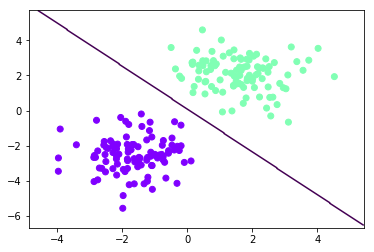

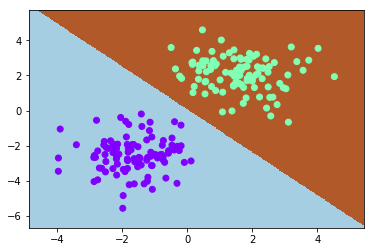

In [7]:
# 极大梯度下降法训练 LinearSVM
import numpy as np

class LinearSVM:
    def __init__(self):
        self._w = self._b = None
        
    def fit(self, x, y, c=1, lr=0.01, epoch=10000):
        x, y = np.asarray(x, np.float32), np.asarray(y, np.float32)
        self._w = np.zeros(x.shape[1])
        self._b = 0.
        for _ in range(epoch):
            self._w *= 1 - lr
            err = 1 - y * self.predict(x, True)
            idx = np.argmax(err)
            # 注意即使所有 x, y 都满足 w·x + b >= 1
            # 由于损失里面有一个 w 的模长平方
            # 所以仍然不能终止训练，只能截断当前的梯度下降
            if err[idx] <= 0:
                continue
            delta = lr * c * y[idx]
            self._w += delta * x[idx]
            self._b += delta
    
    def predict(self, x, raw=False):
        x = np.asarray(x, np.float32)
        y_pred = x.dot(self._w) + self._b
        if raw:
            return y_pred
        return np.sign(y_pred).astype(np.float32)

# 测试
from Util import gen_two_clusters

x, y = gen_two_clusters()
svm = LinearSVM()
svm.fit(x, y)
print("准确率：{:8.6} %".format((svm.predict(x) == y).mean() * 100))

# 可视化
from Util import visualize2d

visualize2d(svm, x, y)
visualize2d(svm, x, y, True)

可视化训练过程
![LinearSVM](https://cdn.rawgit.com/carefree0910/Resources/f0978da2/Lines/LinearSVM.gif)

![LinearSVM](https://cdn.rawgit.com/carefree0910/Resources/f0978da2/Backgrounds/LinearSVM.gif)

准确率：    56.0 %


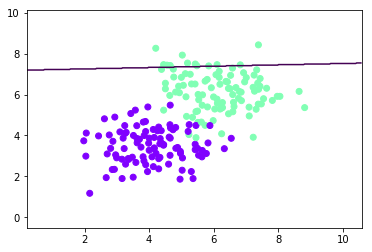

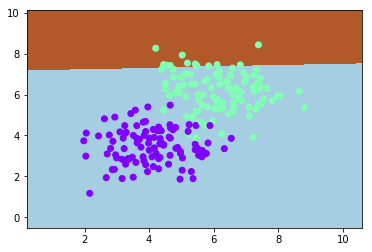

In [8]:
## 存在的问题
'''
+ 由上述可视化其实已经可以看出，用极大梯度下降法训练 LinearSVM 会非常不稳定
+ 从直观上来说，由于 LinearSVM 的损失函数比感知机要更复杂，所以相应的函数形状也会更复杂。
  这意味着当数据集稍微差一点的时候，直接单纯地应用极大梯度下降法可能会导致一些问题
  ——比如说模型会卡在某个很奇怪的地方无法自拔（什么鬼）

可以通过下面这个栗子来直观感受一下 LinearSVM 存在的这些问题：
'''
# 注意我们只是把 center 参数（亦即正负样本点的“中心”）
# 从原点(0, 0)（默认值）挪到(5, 5)（亦即破坏了一定的对称性）、
# 并将正负样本点之间的距离（dis 参数）稍微拉近了一点而已，
# 结果就已经惨不忍睹了
x, y = gen_two_clusters(center=5, dis=1)
svm = LinearSVM()
svm.fit(x, y)
print("准确率：{:8.6} %".format((svm.predict(x) == y).mean() * 100))
visualize2d(svm, x, y)
visualize2d(svm, x, y, True)

![Failure of LinearSVM][1]

可以看到，LinearSVM 确实卡在了奇怪的地方

原理我不敢乱说，这里只提供一个牵强附会的直观解释：

+ 每次只取使得损失函数极大的一个样本进行梯度下降$\rightarrow$模型在某个地方可能来来回回都只受那么几个样本的影响$\rightarrow$死循环（什么鬼！）

专业的理论就留待专业的观众老爷补充吧 ( σ'ω')σ

[1]: https://cdn.rawgit.com/carefree0910/Resources/83441596/Lines/LinearSVM(Failed1).gif

###### 解决方案

极大梯度下降法的最大问题很有可能在于它每次都只根据**使得损失函数最大的一个样本点**来进行梯度下降，这会导致两个问题：

+ 模型的训练将会很不稳定（这点和随机梯度下降类似）
+ 模型对噪声或“不太好的点”极为敏感（因为它们往往会使损失函数最大）

按部就班、我们先解决第一个问题，为此我们只需要多选出几个样本点（比如选出使得损失函数最大的 top n 个样本）、然后取它们梯度的平均即可

+ 注：该名字同样只是我瞎编的一个名字（喂）

准确率：    95.0 %


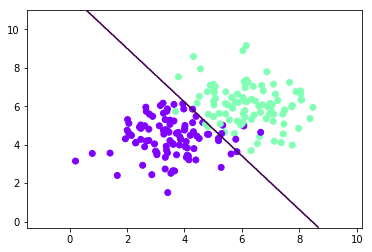

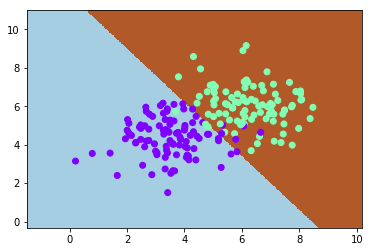

In [9]:
# Top n 梯度下降法
# 继承上一个 LinearSVM 以重复利用代码
class LinearSVM2(LinearSVM):    
    # 用参数 batch_size 表示 Top n 中的 n
    def fit(self, x, y, c=1, lr=0.01, batch_size=128, epoch=10000):
        x, y = np.asarray(x, np.float32), np.asarray(y, np.float32)
        # 如果 batch_size 设得比样本总数还多、则将其改为样本总数
        batch_size = min(batch_size, len(y))
        self._w = np.zeros(x.shape[1])
        self._b = 0.
        for _ in range(epoch):
            self._w *= 1 - lr
            err = 1 - y * self.predict(x, True)
            # 利用 argsort 函数直接取出 Top n
            # 注意 argsort 的结果是从小到大的，所以要用 [::-1] 把结果翻转一下
            batch = np.argsort(err)[-batch_size:][::-1]
            err = err[batch]
            if err[0] <= 0:
                continue
            # 注意这里我们只能利用误分类的样本做梯度下降
            # 因为被正确分类的样本处、这一部分的梯度为 0
            mask = err > 0
            batch = batch[mask]
            # 取各梯度平均并做一步梯度下降
            delta = lr * c * y[batch]
            self._w += np.mean(delta[..., None] * x[batch], axis=0)
            self._b += np.mean(delta)

# 测试            
x, y = gen_two_clusters(center=5, dis=1)
svm = LinearSVM2()
svm.fit(x, y)
print("准确率：{:8.6} %".format((svm.predict(x) == y).mean() * 100))

# 可视化
visualize2d(svm, x, y)
visualize2d(svm, x, y, True)

Top n LinearSVM 准确率：    80.5 %
MBGD  LinearSVM 准确率：    81.0 %


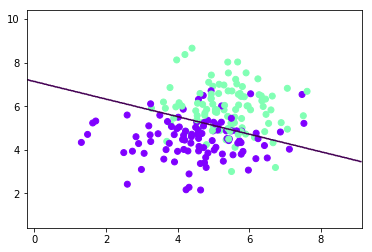

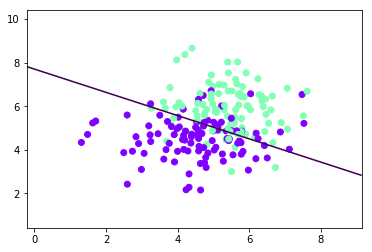

In [10]:
'''
+ 上述解决方案已经不错，但我们还是有些太“激进”了
  ——我们每次进行梯度下降时，选取的样本点都是使得损失函数最大的样本点，
    但一般而言使损失函数最大的样本点如果不是关键的样本点（支持向量）的话、通常而言会是噪声。
    当数据集比较差时，噪声所带来的副作用很有可能就会盖过支持向量带来的正效应
+ 为此，我们应该引入一定的随机性。
  神经网络的训练中所用的 MBGD 就是很好的方法：
    每次都从数据集中抽样出一个小 Batch，然后用这个 Batch 来做梯度下降
'''
### Mini-Batch 梯度下降法（MBGD）
class LinearSVM3(LinearSVM):
    def fit(self, x, y, c=1, lr=0.01, batch_size=128, epoch=10000):
        x, y = np.asarray(x, np.float32), np.asarray(y, np.float32)
        batch_size = min(batch_size, len(y))
        self._w = np.zeros(x.shape[1])
        self._b = 0.
        for _ in range(epoch):
            self._w *= 1 - lr
            # 随机选取 batch_size 个样本
            batch = np.random.choice(len(x), batch_size)
            x_batch, y_batch = x[batch], y[batch]
            err = 1 - y_batch * self.predict(x_batch, True)
            if np.max(err) <= 0:
                continue
            mask = err > 0
            delta = lr * c * y_batch[mask]
            self._w += np.mean(delta[..., None] * x_batch[mask], axis=0)
            self._b += np.mean(delta)

# 进一步拉近正负样本点间的距离以观察性能
x, y = gen_two_clusters(center=5, dis=0.5)
top_n_svm = LinearSVM2()
top_n_svm.fit(x, y)
print("Top n LinearSVM 准确率：{:8.6} %".format((top_n_svm.predict(x) == y).mean() * 100))
mbgd_svm = LinearSVM3()
mbgd_svm.fit(x, y)
print("MBGD  LinearSVM 准确率：{:8.6} %".format((mbgd_svm.predict(x) == y).mean() * 100))

visualize2d(top_n_svm, x, y)
visualize2d(mbgd_svm, x, y)

Top n LinearSVM 准确率：    50.0 %
MBGD  LinearSVM 准确率：    50.0 %


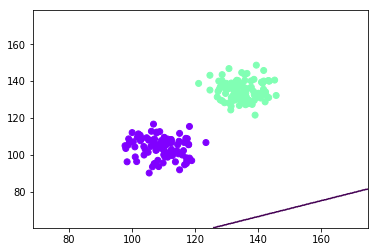

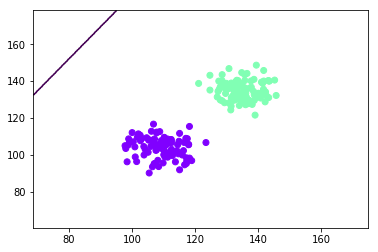

In [11]:
## 存在的问题
'''
Top n LinearSVM 和 MBGD LinearSVM 各有优劣，很难直接说谁好谁坏；
但它们都有一个共同的问题，那就是它们所运用的梯度下降法都只是朴素的`Vanilla Update`，
这会导致当数据的 scale 很大时模型对参数极为敏感、从而导致持续的震荡
（所谓的 scale 比较大，可以理解为“规模很大”，或者直白一点——以二维数据为例的话——就是横纵坐标的数值很大）

可以通过下面这个栗子来直观感受一下 scale 很大的数据所带来的问题：
'''
# 将 scale 从 1（默认）调成 5
x, y = gen_two_clusters(center=5, scale=5)
top_n_svm = LinearSVM2()
top_n_svm.fit(x, y)
print("Top n LinearSVM 准确率：{:8.6} %".format((top_n_svm.predict(x) == y).mean() * 100))
mbgd_svm = LinearSVM3()
mbgd_svm.fit(x, y)
print("MBGD  LinearSVM 准确率：{:8.6} %".format((mbgd_svm.predict(x) == y).mean() * 100))

visualize2d(top_n_svm, x, y)
visualize2d(mbgd_svm, x, y)

通过下面这张动图，我们能够直观地感受数据的 scale 很大时 LinearSVM 的训练过程：

![Failure of LinearSVM][2]

可以看到，模型确实一直在持续震荡

[2]: https://cdn.rawgit.com/carefree0910/Resources/83441596/Lines/LinearSVM(Failed2).gif

###### 解决方案

+ 采用更好的梯度下降法，比如`Adam`之类的
+ 进行数据预处理、把数据的 scale 弄回 1

关于`Adam`等梯度下降算法的实现和在 LinearSVM 上的应用可以参见[这里](https://github.com/carefree0910/MachineLearning/blob/master/NN/Basic/Optimizers.py)和[这里](https://github.com/carefree0910/MachineLearning/blob/master/e_SVM/LinearSVM.py)，下面我们就仅展示进行数据预处理后的结果

Top 1 LinearSVM 准确率：    91.5 %
Top n LinearSVM 准确率：    97.0 %
MBGD  LinearSVM 准确率：    97.0 %


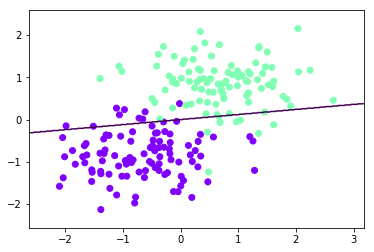

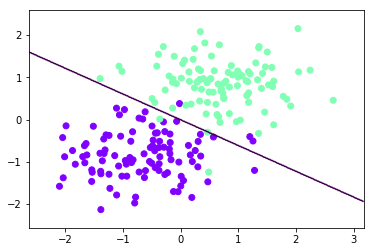

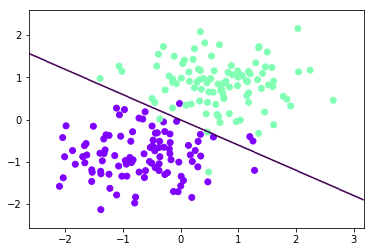

In [13]:
'''
可以看到在归一化处理后，
即使是简单地采用极大梯度下降法，也能够在比较苛刻的数据（`center=5`、`dis=1`、`scale=5`）上表现得不错
'''
x, y = gen_two_clusters(center=5, dis=1, scale=5)
# 进行归一化处理
x -= x.mean(axis=0)
x /= x.std(axis=0)
# Top 1 梯度下降法即为极大梯度下降法
top_1_svm = LinearSVM()
top_1_svm.fit(x, y)
print("Top 1 LinearSVM 准确率：{:8.6} %".format((top_1_svm.predict(x) == y).mean() * 100))
top_n_svm = LinearSVM2()
top_n_svm.fit(x, y)
print("Top n LinearSVM 准确率：{:8.6} %".format((top_n_svm.predict(x) == y).mean() * 100))
mbgd_svm = LinearSVM3()
mbgd_svm.fit(x, y)
print("MBGD  LinearSVM 准确率：{:8.6} %".format((mbgd_svm.predict(x) == y).mean() * 100))

visualize2d(top_1_svm, x, y)
visualize2d(top_n_svm, x, y)
visualize2d(mbgd_svm, x, y)



#### 核感知机

##### 什么是核方法？

往简单里说，核方法是将一个低维的线性不可分的数据映射到一个高维的空间、并期望映射后的数据在高维空间里是线性可分的。我们以异或数据集为例：在二维空间中、异或数据集是线性不可分的；但是通过将其映射到三维空间、我们可以非常简单地让其在三维空间中变得线性可分。比如定义映射：
$$
\phi(x,y)=\left\{
\begin{aligned}
&(x,y,1),\ \ xy>0 \\
&(x,y,0),\ \ xy\le0
\end{aligned}
\right.
$$
该映射的效果如下图所示：

![](svm-kernel1.png)
    
可以看到，虽然左图的数据集线性不可分、但显然右图的数据集是线性可分的，这就是核工作原理的一个不太严谨但仍然合理的解释

从直观上来说，确实容易想象、同一份数据在越高维的空间中越有可能线性可分，但从理论上是否确实如此呢？1965 年提出的 Cover 定理从理论上解决了这个问题，我们会在文末附上相应的公式，这里暂时按下不表

至此，似乎问题就转化为了如何寻找合适的映射$\phi$、使得数据集在被它映射到高维空间后变得线性可分。不过可以想象的是，现实任务中的数据集要比上文我们拿来举例的异或数据集要复杂得多、直接构造一个恰当的$\phi$的难度甚至可能高于解决问题本身。而核方法的巧妙之处就在于，它能将构造映射这个过程再次进行转化、从而使得问题变得简易：它通过核函数来避免显式定义映射$\phi$。往简单里说，核方法会通过用能够表示成$K(x_i,x_j)=\phi(x_i)\cdot\phi(x_j)$的核函数$K(x_i,x_j)$替换各算式中出现的内积$x_i\cdot x_j$来完成将数据从低维映射到高维的过程。换句话说、核方法的思想如下：

- 将算法表述成样本点内积的组合（这经常能通过算法的对偶形式实现）

- 设法找到核函数$K(x_i,x_j)$，它能返回样本点$x_i、x_j$被$\phi$作用后的内积

- 用$K(x_i,x_j)$替换$x_i\cdot x_j$、完成低维到高维的映射（同时也完成了从线性算法到非线性算法的转换）

当然了，不难想象的是，并不是所有的函数$K$都能够对应一个映射（亦即不是所有的$K(x_i,x_j)$都能拆成$\phi(x_i)\cdot\phi(x_j)$；比如说，显然$K(x_i,x_j)$至少需要是一个对称函数）。幸运的是，1909 年提出的 Mercer 定理解决了这个问题，它的具体叙述会在文末给出

Mercer 定理为寻找核函数带来了极大的便利。可以证明如下两族函数都是核函数：

- 多项式核$K(x_i,x_j)=(x_i\cdot x_j+1)^p$
- 径向基（Radial Basis Function，常简称为 RBF）核：$K(x_i,x_j)=\exp\left(-\gamma\|x_i-x_j\|^2\right)$

那么核方法的应用场景有哪些呢？在 2002 年由 Scholkopf 和 Smola 证明的表示定理告诉我们它的应用场景非常广泛。定理的具体内容同样会附在文末，这里就暂时按下不表

##### 核模型的表现

还是用 GIF 来说明问题最为形象。当我们对感知机应用核方法后，它就能对非线性数据集（比如螺旋线数据集）进行分类了，训练过程将如下：

![](svm-kernel2.gif)

##### 怎么应用核方法？

简单来说，就是把算法中涉及到样本$（x_i）$的地方都通过某种变换、弄成样本的内积形式$（x_i\cdot x_j）$。

以感知机为例，感知机的原始损失函数为$L(D) = \sum_{i=1}^N\left[ -y_i(w\cdot x_i+b)\right]_+$

为了让损失函数中的样本都变成内积形式，考虑令
$$
w = \sum_{i=1}^N\alpha_ix_i（也有令w = \sum_{i=1}^N\alpha_iy_ix_i的）
$$
则
$$
\begin{align}
L(D) &= \sum_{i=1}^N\left[ -y_i\left[\left(\sum_{j=1}^N\alpha_jx_j\right)\cdot x_i+b\right]\right]_+ \\
&= \sum_{i=1}^N\left[ -y_i\left(\sum_{j=1}^N\alpha_j(x_i\cdot x_j)+b\right)\right]_+
\end{align}
$$
在此之上应用核方法是平凡的：设核函数为$K$，只需把所有的$x_i\cdot x_j$换成$K(x_i,x_j)$即可：
$$
L(D) = \sum_{i=1}^N\left[ -y_i\left(\sum_{j=1}^N\alpha_jK(x_i,x_j)+b\right)\right]_+
$$
于是优化问题变为
$$
\min_{\alpha}\sum_{i=1}^N\left[ -y_i\left(\sum_{j=1}^N\alpha_jK(x_i,x_j)+b\right)\right]_+
$$
预测步骤则变为
$$
y_{\text{pred}}=w\cdot x+b=\sum_{i=1}^N\alpha_iK(x_i, x)+b
$$
对于 LinearSVM 而言，用同样的手法不难得出其核形式：
$$
L(D)=\frac12\sum_{i=1}^N\sum_{j=1}^N\alpha_i\alpha_jK(x_i,x_j)+C\sum_{i=1}^N\left[ 1-y_i\left(\sum_{j=1}^N\alpha_jK(x_i,x_j)+b\right)\right]_+
$$
预测步骤则仍然是
$$
y_{\text{pred}}=w\cdot x+b=\sum_{i=1}^N\alpha_iK(x_i, x)+b
$$
（有没有发现核形式和对偶形式很像？( σ'ω')σ）

##### 如何训练核模型？

【注意：为简洁，从此往后的推导和实现均以核感知机为例，核 SVM 的相关讨论会放在下一章介绍 SMO 算法时进行】

简洁起见，我们还是用梯度下降法来进行训练，为此我们需要进行求导工作。假设当前模型参数为$\alpha=(\alpha_1,\alpha_2,...,\alpha_N)^T$，$x_i$在参数$\alpha$下的预测值为$\hat y_i$，则：

- $\frac{\partial L}{\partial\alpha_i}=-\sum_{y_j\hat y_j<0}y_jK(x_j, x_i)$
- $\frac{\partial L}{\partial b}=-\sum_{y_j\hat y_j<0}y_j$

为了加速训练，我们需要将该算式向量化，为此我们需要定义核矩阵。假设现在我们有两组样本：$(x^{(1)}_1,x^{(2)}_2,...,x^{(1)}_M)^T$和$(x^{(2)}_1, x^{(2)}_2,...,x^{(2)}_N)^T$，那么它们的核矩阵即为
$$
\textbf{ K} = \left[\begin{matrix}
K(x^{(1)}_1,x^{(2)}_1) & \ldots & K(x^{(1)}_1,x^{(2)}_N) \\
\vdots & \ddots & \vdots \\
K(x^{(1)}_M,x^{(2)}_1) & \ldots & K(x^{(1)}_M,x^{(2)}_N)
\end{matrix}\right]_{N\times N}
$$
对于训练过程而言，我们关心的是训练样本之间的核矩阵
$$
\textbf{ K} = \left[\begin{matrix}
K(x_1,x_1) & \ldots & K(x_1,x_N) \\
\vdots & \ddots & \vdots \\
K(x_N,x_1) & \ldots & K(x_N,x_N)
\end{matrix}\right]_{N\times N}
$$
利用它，不难写出相应的向量化代码：
```python
# 假设 k_mat 存储着原样本之间的核矩阵
# 1、计算损失
err = -y * (k_mat.dot(alpha) + b)
# 2、找出使得损失不小于 0 的样本
mask = err >= 0
# 3、进行相应梯度下降，lr 是学习速率
delta = lr * y[mask]
alpha += np.sum(delta[..., None] * k_mat[mask], axis=0)
b += np.sum(delta)
```

对于预测过程，我们关心的是原样本和新样本之间的核矩阵。

假设新样本为$(\tilde x_1,...,\tilde x_n)^T$，则
$$
\textbf{K} = \left[\begin{matrix}
K(x_1,\tilde x_1) & \ldots & K(x_1,\tilde x_n) \\
\vdots & \ddots & \vdots \\
K(x_N,\tilde x_1) & \ldots & K(x_N,\tilde x_n)
\end{matrix}\right]_{N\times n}
$$

那么预测过程即为

$$
y_{\text{pred}}=\sum_{i=1}^N\alpha_iK(x_i,x)+b=\alpha^T\textbf{K}+b
$$

于是关键就在于如何定义计算核矩阵的核函数了。对于多项式核来说，核函数的实现是直观的：

```python
@staticmethod
def _poly(x, y, p):
    return (x.dot(y.T) + 1) ** p
```
但对于 RBF 来说就没那么直观了，用到了 Numpy 的高级实用技巧之一——升维：
```python
@staticmethod
def _rbf(x, y, gamma):
    return np.exp(-gamma * np.sum((x[..., None, :] - y) ** 2, axis=2))
```
当然直接用 for 来实现也是可以的，不过那将会非常非常慢……

##### 核模型的实现

如果思路能够整理清楚，那么核模型相比原模型来说只有如下两点改变：

- 需要定义核函数并计算出核矩阵
- 计算预测值时不是$w\cdot x+b=w^Tx+b$，而是$\alpha^T\textbf{K}+b$，其中
  - 在训练时，\textbf{K}为原样本之间的核矩阵
  - 在测试时，\textbf{K}为原样本和新样本的核矩阵

所以实现起来的话会有许多重复代码，这里就只展现其中最核心的部分（仍以核感知机为例）：
```python
# 训练代码
def fit(...):
    ...
    self._alpha = np.zeros(len(x))
    self._b = 0.
    self._x = x
    # self._kernel 即为核函数，能够计算两组样本的核矩阵
    k_mat = self._kernel(x, x)
    for _ in range(epoch):
        err = -y * (self._alpha.dot(k_mat) + self._b)
        if np.max(err) < 0:
            continue
        mask = err >= 0
        delta = lr * y[mask]
        self._alpha += np.sum(delta[..., None] * k_mat[mask], axis=0)
        self._b += np.sum(delta)

# 预测代码
def predict(self, x, raw=False):
    x = np.atleast_2d(x).astype(np.float32)
    # 计算原样本与新样本的核矩阵并根据它来计算预测值
    k_mat = self._kernel(self._x, x)
    y_pred = self._alpha.dot(k_mat) + self._b
    if raw:
        return y_pred
    return np.sign(y_pred).astype(np.float32)
```

##### 相关数学理论

###### 1）Cover 定理

若设 d 维空间中 N 个点线性可分的概率为$p(d,N)$，那么就有：
$$
p(d,N)=\frac{2\sum_{i=0}^mC_{N-1}^i}{2^N}=\left\{
\begin{aligned}
&\frac{\sum_{i=1}^dC^i_{N-1}}{2^{N-1}},\ \ &N>d+1 
\\
&1,\ \ &N\le d+1
\end{aligned}
\right.
$$
其中$m=\min(d,N-1)$

证明从略（也就是说我不会）（喂），但是不难从中看出，它证明了当空间的维数 d 越大时、其中的 N 个点线性可分的概率就越大，这构成了核方法的理论基础之一

###### 2）Mercer 定理

若$K(x_i,x_j)$是对称函数（亦即$K(x_i,x_j)=K(x_j,x_i)）$的话，那么它具有 Hilbert 空间中内积形式的充要条件有以下两个：

对任何平方可积的函数g、满足
$$\int{K(x_i,x_j)g(x_i)g(x_j)dx_idx_j}\ge0$$
对含任意 N 个样本的数据集$D={x_1,x_2,...,x_N}$，核矩阵：
$$
\textbf{K} = \left[\begin{matrix}
K(x_1,x_1) & \ldots & K(x_1,x_N) \\
\vdots & \ddots & \vdots \\
K(x_N,x_1) & \ldots & K(x_N,x_N)
\end{matrix}\right]_{N\times N}
$$
是半正定矩阵

【注意：通常我们会称满足这两个充要条件之一的函数为 Mercer 核函数而把核函数定义得更宽泛。不过如果不打算在理论上深入太多的话，将 Mercer 核函数简称为核函数是可以的。此外，虽说 Mercer 核函数确实具有 Hilbert 空间中的内积形式、但此时的 Hilbert 空间并不一定具有“维度”这么好的概念（或说、可以认为此时 Hilbert 空间的维度为无穷大；比如说 RBF 核，它映射后的空间就是无穷维的）】

###### 3）表示定理

设$\mathcal{H}$为核函数K对应的映射后的空间（RKHS），$\|h\|_\mathcal{H}$表示$\mathcal{H}$中h的范数，那么对于任意单调递增的函数C和任意非负损失函数L、优化问题

$$\min_{h\in\mathcal{H}}L\left(h(x_1),...,h(x_N)\right)+C(\|h\|_{\mathcal{H}})$$

的解总可以表述为核函数K的线性组合
$$
h^*(x)=\sum_{i=1}^N\alpha_iK(x,x_i)
$$
这意味着对于任意一个损失函数和一个单调递增的正则化项组成的优化问题、我们都能够对其应用核方法

准确率：   100.0 %


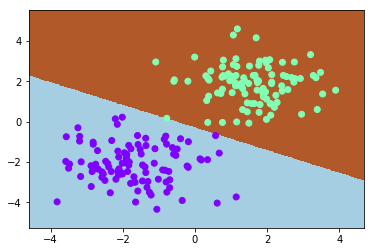

准确率：    84.5 %


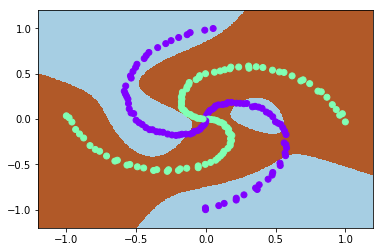

In [15]:
# 核感知机
import numpy as np

class KP:
    def __init__(self):
        self._x = None
        self._alpha = self._b = self._kernel = None
    
    # 定义多项式核函数
    @staticmethod
    def _poly(x, y, p=4):
        return (x.dot(y.T) + 1) ** p
    
    # 定义 rbf 核函数
    @staticmethod
    def _rbf(x, y, gamma):
        return np.exp(-gamma * np.sum((x[..., None, :] - y) ** 2, axis=2))
        
    def fit(self, x, y, kernel="poly", p=None, gamma=None, lr=0.001, batch_size=128, epoch=10000):
        x, y = np.asarray(x, np.float32), np.asarray(y, np.float32)
        if kernel == "poly":
            p = 4 if p is None else p
            self._kernel = lambda x_, y_: self._poly(x_, y_, p)
        elif kernel == "rbf":
            gamma = 1 / x.shape[1] if gamma is None else gamma
            self._kernel = lambda x_, y_: self._rbf(x_, y_, gamma)
        else:
            raise NotImplementedError("Kernel '{}' has not defined".format(kernel))
        self._alpha = np.zeros(len(x))
        self._b = 0.
        self._x = x
        k_mat = self._kernel(x, x)
        for _ in range(epoch):
            indices = np.random.permutation(len(y))[:batch_size]
            k_mat_batch, y_batch = k_mat[indices], y[indices]
            err = -y_batch * (k_mat_batch.dot(self._alpha) + self._b)
            if np.max(err) < 0:
                continue
            mask = err >= 0
            delta = lr * y_batch[mask]
            self._alpha += np.sum(delta[..., None] * k_mat_batch[mask], axis=0)
            self._b += np.sum(delta)
    
    def predict(self, x, raw=False):
        x = np.atleast_2d(x).astype(np.float32)
        k_mat = self._kernel(self._x, x)
        y_pred = self._alpha.dot(k_mat) + self._b
        if raw:
            return y_pred
        return np.sign(y_pred).astype(np.float32)

# 在线性数据集上进行测试    
from Util import gen_two_clusters, visualize2d

xc, yc = gen_two_clusters()
kp = KP()
kp.fit(xc, yc, p=1)
print("准确率：{:8.6} %".format((kp.predict(xc) == yc).mean() * 100))
visualize2d(kp, xc, yc, True)
# 在非线性数据集上进行测试
from Util import gen_spiral

xs, ys = gen_spiral()
kp = KP()
kp.fit(xs, ys, p=8)
print("准确率：{:8.6} %".format((kp.predict(xs) == ys).mean() * 100))
visualize2d(kp, xs, ys, True)

#### 核SVM
###### SMO 算法概述

SMO 是由 Platt 在 1998 年提出的、针对软间隔最大化 SVM 对偶问题求解的一个算法，其基本思想很简单：在每一步优化中，挑选出诸多参数$（\alpha_k(k=1,2,...,N)）$中的两个参数$（\alpha_i、\alpha_j）$作为“真正的参数”，其余参数都视为常数，从而问题就变成了类似于二次方程求最大值的问题，从而我们就能求出解析解

具体而言，SMO 要解决的是如下对偶问题：
$$
\max_\alpha L(\alpha)=-\frac12\sum_{i=1}^N\sum_{j=1}^N\alpha_i\alpha_jy_iy_j(x_i\cdot x_j) + \sum_{i=1}^N\alpha_i
$$
使得对$i=1,...,N$、都有
$$
\sum_{i=1}^N\alpha_iy_i=0、0\le\alpha_i\le C
$$
其大致求解步骤则可以概括如下：

选出$\alpha_1,\alpha_2,...,\alpha_N$中“最不好的”两个参数$\alpha_i、\alpha_j$
只把$\alpha_i、\alpha_j$视为参数并把其余的$\alpha_k$视为常数，于是最大化$L(\alpha)$就变成了以$\alpha_i、\alpha_j$为参数的二次规划问题，从而可以直接对其进行求解；但是，注意到$\alpha_i、\alpha_j$需满足$\sum_{i=1}^N\alpha_iy_i=0$和$0\le\alpha_i、\alpha_j\le C$，所以求完解后需要检查是否满足约束；如不满足，则进行调整

##### KKT 条件

先来看如何选取参数。在 SMO 算法中，我们是依次选取参数的：

- 选出违反 KKT 条件最严重的样本点、以其对应的参数作为第一个参数
- 第二个参数的选取有一种比较繁复且高效的方法，但对于一个朴素的实现而言、第二个参数即使随机选取也无不可

这里就有了一个叫 KKT 条件的东西，其详细的陈列会放在文末，这里就仅简要的说明一下。

具体而言，对于已有的模型$f(x)=w\cdot x + b$来说，$\alpha_i$及其对应样本$(x_i,y_i)$的 KKT 条件为：
$$
\begin{align}
\alpha_i=0&\Leftrightarrow y_if(x_i)>1 \\
0<\alpha_i<C&\Leftrightarrow y_if(x_i)=1 \\
\alpha_i = C&\Leftrightarrow y_if(x_i)<1
\end{align}
$$
注意我们之前提过样本到超平面的函数间隔为$y(w\cdot x+b)$，所以上述 KKT 条件可以直观地叙述为：

- $\alpha_i=0\Leftrightarrow$样本离间隔超平面比较远
- $0<\alpha_i<C\Leftrightarrow$样本落在间隔超平面上
- $\alpha_i=C\Leftrightarrow$样本在间隔超平面以内

【注意：这里的间隔超平面即为满足方程y(w\cdot x+b)=1的平面；由于y可以取正负一两个值，所以间隔超平面会有两个——w\cdot x+b=1和w\cdot x+b=-1。而分类超平面则是满足w\cdot x+b=0的平面，需要将它和间隔超平面加以区分】

可以以一张图来直观理解这里提到的诸多概念：

![](svm-kernel3.png)

图中外面有个黑圆圈的其实就是传说中的“支持向量”，其定义会在文末给出

那么我们到底应该如何刻画“违反 KKT 条件”这么个东西呢？从直观上来说，我们可以有这么一种简单有效的定义：

- 计算三份“差异向量”$c^{(k)}=(c^{(k)}_1,c^{(k)}_2,...,c^{(k)}_N)^T\ \ (k=1,2,3)$，其中第k份对应于三个 KKT 条件中的第k个，且$c^{(k)}_i=y_if(x_i)-1\ \ (i=1,2,...,N)$

- 针对不同的 KKT 条件，将$c^{(k)}$的某些位置$c^{(k)}_i$置为 0。具体而言：

  - 对第一个 KKT 条件$\alpha_i=0\Leftrightarrow y_if(x_i)>1\Leftrightarrow c^{(1)}_i>0$而言，满足以下两种情况的$c^{(1)}_i$将应该置为 0：
    - $\alpha_i>0且c^{(1)}_i\le0$
    - $\alpha_i=0且c^{(1)}_i>0$
  - 对第二个 KKT 条件$0<\alpha_i<C\Leftrightarrow y_if(x_i)=1\Leftrightarrow c^{(2)}_i=0$而言则是：
    - $（\alpha_i=0或\alpha_i=C）且c^{(2)}_i\ne0$
    - $0<\alpha_i<C且c^{(2)}_i=0$
  - 对第三个 KKT 条件$\alpha_i = C\Leftrightarrow y_if(x_i)<1\Leftrightarrow c^{(3)}_i<0$亦同理：
    - $\alpha_i<C且c^{(3)}_i\ge0$
    - $\alpha_i=C且c^{(3)}_i<0$
    
最后则可以简单的将三份差异向量的平方相加来作为“损失”，从而直接选出使该损失最大的$\alpha_i$作为 SMO 的第一个参数即可。具体而言：

$$i=\arg\max_i\left\{ c^{(1)^2}_i + c^{(2)^2}_i + c^{(3)^2}_i | i=1,2,...,N\right\}$$

得益于 Numpy 强大的 Fancy Indexing，上述置 0 的实现非常好写（？？？）：

```python
# 得到 alpha > 0 和 alpha < C 的 mask
con1 = alpha > 0
con2 = alpha < C
# 算出“差异向量”并拷贝成三份
err1 = y * y_pred - 1
err2 = err1.copy()
err3 = err1.copy()
# 依次根据三个 KKT 条件，将差异向量的某些位置设为 0
# 不难看出为了直观、我做了不少重复的运算，所以这一步是可以优化的
err1[(con1 & (err1 <= 0)) | (~con1 & (err1 > 0))] = 0
err2[((~con1 | ~con2) & (err2 != 0)) | ((con1 & con2) & (err2 == 0))] = 0
err3[(con2 & (err3 >= 0)) | (~con2 & (err3 < 0))] = 0
# 算出平方和并取出使得“损失”最大的 idx
err = err1 ** 2 + err2 ** 2 + err3 ** 2
idx = np.argmax(err)

```
第二个参数则可以简单地随机选取，虽然这不是特别好，但效果已然不错，而且不仅实现起来更简便、运行起来也更快（其实就是我太懒）（喂）。具体代码如下：

```python
idx = np.random.randint(len(self._y))
# 这里的 idx1 是第一个参数对应的 idx
while idx == idx1:
    idx = np.random.randint(len(self._y))
return idx
```
至于 SMO 算法的第二步，正如前文所说，它的本质就是一个带约束的二次规划，虽然求解过程可能会比较折腾，但其实难度不大。具体步骤会放在文末，这里就暂时按下


##### SMO 的效果

![](svm-kernel4.gif)

略显纠结，不过还是不错的

接下来看看蘑菇数据集上的表现；单就这个数据集而言，我们实现的朴素 SVM 和 sklearn 中的 SVM 表现几乎是一致的（在使用 RBF 核时），比较具有代表性的训练曲线则如下图所示：

![](svm-kernel5.png)

也算是符合 SMO 这种每次只取两个参数进行更新的训练方法的直观

##### 相关数学理论

###### 1）KKT 条件的详细陈列

注意到原始问题为
$$
\min_{w,b,\xi}L(w,b,\xi)=\frac12\|w\|^2+C\sum_{i=1}^N\xi_i，使得\xi^*\ge0、y_i(w\cdot x_i+b)\ge1-\xi_i（不妨称这两个约束为原始约束）
$$
所以其拉格朗日算子法对应的式子为
$$
L=L(w,b,\xi,\alpha,\beta)=\frac12\|w\|^2+C\sum_{i=1}^N\xi_i-\sum_{i=1}^N\alpha_i[y_i(w\cdot x_i+b)-1+\xi_i]-\sum_{i=1}^N\beta_i\xi_i
$$
于是 KKT 条件的其中四个约束即为（不妨设最优解为$w^*、b^*、\xi^*、\alpha^*和\beta^*$）：

- $ \alpha_i^*\ge0,\beta_i^*\ge0 $（这是拉格朗日乘子法自身的要求）
- $ \xi_i^*\ge0、y_i(w^*\cdot x_i+b^*)-1+\xi_i^*\ge0 $（此即原始约束）
- $ \alpha_i^*[y_i(w^*\cdot x_i+b^*)-1+\xi_i^*]=0 $（换句话说，$ \alpha_i^*和y_i(w^*\cdot x_i+b)-1+\xi_i^* $中必有一个为 0）
  - 该等式有着很好的直观：设想它们同时不为 0，则必有$ y_i(w^*\cdot x_i+b)-1+\xi_i^*>0 $（注意原始约束）、从而$\alpha_i^*[y_i(w^*\cdot x_i+b^*)-1+\xi_i^*]\ge0 $，等号当且仅当$ \alpha_i=0 $时取得。然而由于$\alpha_i^*\ne0$，所以若将$\alpha_i$取为 0、则上述L将会变大。换句话说，将参数$\alpha_i$取为 0 将会使得目标函数比参数取$\alpha_i^*$时的目标函数要大，这与$\alpha_i^*$的最优性矛盾
- $\beta_i^*\xi_i^*=0$ （换句话说，$\beta_i^*$ 和$ \xi_i^*$ 中必有一个为 0，理由同上）

从而原始问题转为$\min_{w,b}\max_\alpha L$；而对偶问题的实质，其实就是将原始问题$\min_{w,b}\max_\alpha L转为\max_\alpha\min_{w,b} L$。在求解$\nabla_wL=\nabla_bL=\nabla_\xi L=0$后，可以得到如下对偶问题：
$$
\max_\alpha L(\alpha)=-\frac12\sum_{i=1}^N\sum_{j=1}^N\alpha_i\alpha_jy_iy_j(x_i\cdot x_j) + \sum_{i=1}^N\alpha_i，使得对i=1,...,N、都有\sum_{i=1}^N\alpha_iy_i=0、0\le\alpha_i\le C
$$
（虽然这些在 Python · SVM（二）· LinearSVM 中介绍过，不过为了连贯性，这里还是再介绍一遍）

于是，最优解自然需要满足这么个条件：
$$
\nabla_wL(w^*,b^*,\xi^*,\alpha^*,\beta^*)=\nabla_bL(w^*,b^*,\xi^*,\alpha^*,\beta^*)=\nabla_\xi L(w^*,b^*,\xi^*,\alpha^*,\beta^*)=0
$$
这个条件即是最后一个 KKT 条件

###### 2）何谓“支持向量”

为方便说明，这里再次放出上文给出过的图：

![](svm-kernel3.png)

图中带黑圈的样本点即是支持向量，数学上来说的话，就是$\alpha_i>0$对应的样本点即是支持向量。从图中不难看出，支持向量从直观上来说，就是比较难分的样本点

此外，支持向量之所以称之为“支持”向量，是因为在理想情况下，仅利用支持向量训练出来的模型和利用所有样本训练出来的模型是一致的。这从直观上是好理解的，粗略的证明则可以利用其定义来完成：非支持向量的样本对应着$\alpha_i=0$，亦即它对最终模型——$f(x)=\sum_{i=1}^N\alpha_iy_i(x_i\cdot x)+b$没有丝毫贡献，所以可以直接扔掉

###### 3）带约束的二次规划求解方法

不妨设我们选取出来的两个参数就是$\alpha_1和\alpha_2$，那么问题的关键就在于如何把$\alpha_1和\alpha_2$相关的东西抽取出来并把其它东西扔掉

注意到我们的对偶问题为
$$
\max_\alpha L(\alpha)=-\frac12\sum_{i=1}^N\sum_{j=1}^N\alpha_i\alpha_jy_iy_j(x_i\cdot x_j) + \sum_{i=1}^N\alpha_i，使得对i=1,...,N、都有\sum_{i=1}^N\alpha_iy_i=0、0\le\alpha_i\le C
$$
且我们在 Python · SVM（一）· 感知机 的最后介绍过 Gram 矩阵：
$$
G=(x_i\cdot x_j)_{N\times N}
$$
所以L就可以改写为$L(\alpha)=-\frac12\sum_{i=1}^N\sum_{j=1}^N\alpha_i\alpha_jy_iy_jG_{ij}+\sum_{i=1}^N\alpha_i$

把和$\alpha_1、\alpha_2$无关的东西扔掉之后，L可以化简为：
$$
L(\alpha)=-\frac12(G_{11}\alpha_1^2+2y_1y_2G_{12}\alpha_1\alpha_2+G_{22}\alpha_2^2)-\left(y_1\alpha_1\sum_{i=3}^Ny_i\alpha_iG_{i1}+y_2\alpha_2\sum_{i=3}^Ny_i\alpha_iG_{i2}\right)+(\alpha_1+\alpha_2)
$$
约束条件则可以化简为对i=1和i=2，都有$y_1\alpha_1+y_2\alpha_2=-\sum_{i=3}^Ny_i\alpha_i=c、0\le\alpha_i\le C$，其中c是某个常数

而带约束的二次规划求解过程也算简单：只需先求出无约束下的最优解，然后根据约束“裁剪”该最优解即可

无约束下的求解过程其实就是求偏导并令其为 0。以\alpha_1为例，注意到
$$
y_1\alpha_1+y_2\alpha_2=c\Rightarrow\alpha_2=\frac c{y_2}-\frac{y_1}{y_2}\alpha_1
$$
令$c^*=\frac c{y_2},\ \ s=y_1y_2$，则$c^*$亦是常数，且由于$y_1、y_2$都只能取正负 1，故不难发现$\frac{y_2}{y_1}=\frac{y_1}{y_2}=s$，从而$\alpha_2=c^*-s\alpha_1\Rightarrow\frac{\partial\alpha_2}{\partial\alpha_1}=-s$

于是
$$
\begin{align}
\frac{\partial L}{\partial\alpha_1}=&-G_{11}\alpha_1-y_1y_2G_{12}(\alpha_2+\alpha_1\frac{\partial\alpha_2}{\partial\alpha_1})-G_{22}\alpha_2\frac{\partial\alpha_2}{\partial\alpha_1} \\
&-y_1\sum_{i=3}^Ny_i\alpha_iG_{i1}-y_2\frac{\partial\alpha_2}{\partial\alpha_1}\sum_{i=3}^Ny_i\alpha_iG_{i2}+1 \\
=&-G_{11}\alpha_1-sG_{12}(c^*-s\alpha_1-\alpha_1\cdot s)-G_{22}(c^*-s\alpha_1)\cdot(-s) \\
&-y_1\sum_{i=3}^Ny_i\alpha_iG_{i1}+sy_2\sum_{i=3}^Ny_i\alpha_iG_{i2}+\left(\frac{\partial\alpha_2}{\partial\alpha_1}+1\right)
\end{align}
$$
考虑到$s^2=1、sy_2=y_1$、Gram 矩阵是对称阵、且模型在第k个样本$x_k$处的输出为$f(x_k)=\sum_{i=1}^N\alpha_iy_i(x_i\cdot x_k)+b=\sum_{i=1}^N\alpha_iy_iG_{ik}+b$，从而可知
$$
\begin{align}
\frac{\partial L}{\partial\alpha_1}=&-G_{11}\alpha_1-sG_{12}c^*+2G_{12}\alpha_1+sG_{22}c^*-G_{22}\alpha_1 \\
&-y_1[f(x_1)-y_1\alpha_1G_{11}-y_2\alpha_2G_{21}] \\
&+y_1[f(x_2)-y_1\alpha_1G_{12}-y_2\alpha_2G_{22}] +(1-s)
\end{align}
$$
令$v_i=(f(x_i)-b)-y_1\alpha_1G_{1i}-y_2\alpha_2G_{2i}\ \ (i=1,2)$，则
$$
\frac{\partial L}{\partial\alpha_1}=-(G_{11}-2G_{12}+G_{22})\alpha_1-sc^*(G_{12}-G_{22})-y_1(v_1-v_2)+(1-s)
$$
于是
$$
\begin{align}
\frac{\partial L}{\partial\alpha_1}=0\Rightarrow\alpha_1&=-\frac{sc^*(G_{12}-G_{22})+y_1(v_1-v_2)-(1-s)}{G_{11}-2G_{12}+G_{22}} \\
&=-\frac{y_1[y_2c^*(G_{12}-G_{22})+(v_1-v_2)-(y_1-y_2)]}{G_{11}-2G_{12}+G_{22}}
\end{align}
$$
注意到$c^*=s\alpha_1+\alpha_2$，从而
$$
y_2c^*(G_{12}-G_{22})=y_2(s\alpha_1+\alpha_2)(G_{12}-G_{22})=(y_1\alpha_1+y_2\alpha_2)(G_{12}-G_{22})
$$
令$dG=G_{11}-2G_{12}+G_{22}、e_i=f(x_i)-y_i\ \ (i=1,2)$，则
$$
y_2c^*(G_{12}-G_{22})+(v_1-v_2)-(y_2+y_1)=... =e_1 - e_2 - y_1\alpha_1dG
$$
从而
$$
\alpha_1^{new,raw}=\alpha_1^{old}-\frac{y_1(e_1-e_2)}{dG}
$$
接下来就要对其进行裁剪了。注意到我们的约束为
$$
0\le\alpha_i\le C、\alpha_1y_1+\alpha_2y_2为常数
$$
所以我们需要分情况讨论$\alpha_1$的下、上界

- 当$y_1,y_2$异号$（y_1y_2=-1）$时，可知$\alpha_1-\alpha_2$为常数、亦即$\alpha_1^{new}-\alpha_2^{new}=\alpha_1^{old}-\alpha_2^{old}\Rightarrow\alpha_2^{new}=\alpha_1^{new}-(\alpha_1^{old}-\alpha_2^{old})$
  结合0\le\alpha_2\le C，可知：
  - $\alpha_1^{new}不应小于\alpha_1^{old}-\alpha_2^{old}$，否则$\alpha_2$将小于 0
  - $\alpha_1^{new}不应大于C+\alpha_1^{old}-\alpha_2^{old}$，否则$\alpha_2$将大于 C
- 当$y_1,y_2$同号$（y_1y_2=1）$时，可知$\alpha_1+\alpha_2$为常数、亦即$\alpha_1^{new}+\alpha_2^{new}=\alpha_1^{old}+\alpha_2^{old}\Rightarrow\alpha_2^{new}=(\alpha_1^{old}+\alpha_2^{old}) - \alpha_1^{new}$结合0\le\alpha_2\le C，可知：
  - $\alpha_1^{new}$不应小于$\alpha_1^{old}+\alpha_2^{old}-C$，否则$\alpha_2$将大于 C
  - $\alpha_1^{new}$不应大于$\alpha_1^{old}+\alpha_2^{old}$，否则$\alpha_2$将小于 0

综上可知

- $\alpha_1^{new}$的下界为$U=\left\{\begin{aligned}
\max\{0,\alpha_1^{old}-\alpha_2^{old}\}\ \ &y_1y_2=-1 \\
\max\{0,\alpha_1^{old}+\alpha_2^{old}-C\}\ \ &y_1y_2=1
\end{aligned}
\right.$

- $\alpha_1^{new}$的上界为$V=\left\{\begin{aligned}
\min\{C,C+\alpha_1^{old}-\alpha_2^{old}\}\ \ &y_1y_2=-1 \\
\max\{C,\alpha_1^{old}+\alpha_2^{old}\}\ \ &y_1y_2=1
\end{aligned}
\right.$

那么直接做一个 clip 即可得到更新后的$\alpha_1$：
```python
alpha1_new = np.clip(alpha1_new_raw, u, v)
```
注意由于我们要保持$\alpha_1y_1+\alpha_2y_2$为常数，所以（注意$\frac{y_1}{y_2}=y_1y_2$）
$$
\begin{align}
\alpha_2^{new}&=\frac1{y_2}(\alpha_1^{old}y_1+\alpha_2^{old}y_2-\alpha_1^{new}y_1) \\
&=\alpha_2^{old}+y_1y_2(\alpha_1^{old}-\alpha_1^{new})
\end{align}$$
综上所述，我们就完成了一次参数的更新，之后就不断地更新直至满足停机条件即可

此外，我在 Python · SVM（三）· 核方法 这篇文章中提到过，对 SVM 的对偶形式应用核方法会非常自然。表现在 SMO 上的话就是，我们可以通过简单粗暴地将核矩阵K代替 Gram 矩阵G来完成核方法的应用。直观地说，我们只需将上面所有出现过的G都换成K就行了

至此，SVM 算法的介绍就大致告一段落了。我们从感知机出发，依次介绍了“极大梯度法”、MBGD（Batch 梯度下降）法、核方法和 SMO 算法；虽然都有点浅尝辄止的味道，但覆盖的东西……大概还是挺多的

准确率：    99.5 %


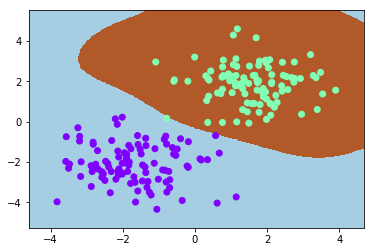

准确率：    54.5 %


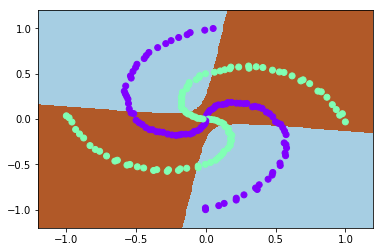

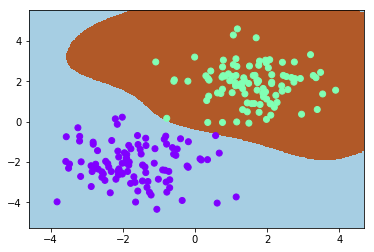

准确率：   100.0 %


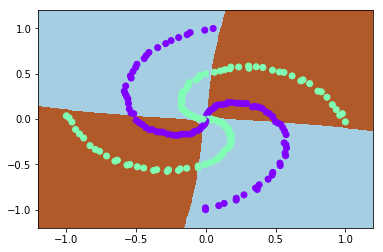

准确率：    54.0 %


In [16]:
# 核SVM
class SVM(KP):        
    def fit(self, x, y, kernel="rbf", p=None, gamma=None, c=1, lr=0.0001, batch_size=128, epoch=10000):
        x, y = np.asarray(x, np.float32), np.asarray(y, np.float32)
        if kernel == "poly":
            p = 4 if p is None else p
            self._kernel = lambda x_, y_: self._poly(x_, y_, p)
        elif kernel == "rbf":
            gamma = 1 / x.shape[1] if gamma is None else gamma
            self._kernel = lambda x_, y_: self._rbf(x_, y_, gamma)
        else:
            raise NotImplementedError("Kernel '{}' has not defined".format(kernel))
        self._alpha = np.zeros(len(x))
        self._b = 0.
        self._x = x
        k_mat = self._kernel(x, x)
        k_mat_diag = np.diag(k_mat)
        for _ in range(epoch):
            self._alpha -= lr * (np.sum(self._alpha * k_mat, axis=1) + self._alpha * k_mat_diag) * 0.5
            indices = np.random.permutation(len(y))[:batch_size]
            k_mat_batch, y_batch = k_mat[indices], y[indices]
            err = 1 - y_batch * (k_mat_batch.dot(self._alpha) + self._b)
            if np.max(err) <= 0:
                continue
            mask = err > 0
            delta = c * lr * y_batch[mask]
            self._alpha += np.sum(delta[..., None] * k_mat_batch[mask], axis=0)
            self._b += np.sum(delta)

# 在线性数据集上进行测试
svm = SVM()
svm.fit(xc, yc)
print("准确率：{:8.6} %".format((svm.predict(xc) == yc).mean() * 100))
visualize2d(svm, xc, yc, True)
# 在非线性数据集上进行测试
svm = SVM()
svm.fit(xs, ys)
print("准确率：{:8.6} %".format((svm.predict(xs) == ys).mean() * 100))
visualize2d(svm, xs, ys, True)
#和 sklearn 的 SVM 进行比较
from sklearn.svm import SVC
svm = SVC()
svm.fit(xc, yc)
visualize2d(svm, xc, yc, True)
print("准确率：{:8.6} %".format((svm.predict(xc) == yc).mean() * 100))
svm.fit(xs, ys)
visualize2d(svm, xs, ys, True)
print("准确率：{:8.6} %".format((svm.predict(xs) == ys).mean() * 100))

In [29]:
from sklearn import svm
X = [[0, 0], [1, 1]]
y = [0, 1]
clf = svm.SVC()
print(clf.fit(X, y)) 
print(clf.predict([[2., 2.]]))
# get support vectors
print(clf.support_vectors_)
# get indices of support vectors
print(clf.support_)
# get number of support vectors for each class
print(clf.n_support_) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
[1]
[[ 0.  0.]
 [ 1.  1.]]
[0 1]
[1 1]


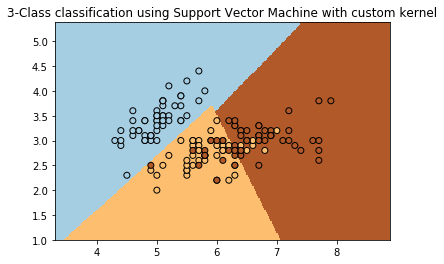

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features. We could
                      # avoid this ugly slicing by using a two-dim dataset
Y = iris.target


def my_kernel(X, Y):
    """
    We create a custom kernel:

                 (2  0)
    k(X, Y) = X  (    ) Y.T
                 (0  1)
    """
    M = np.array([[2, 0], [0, 1.0]])
    return np.dot(np.dot(X, M), Y.T)


h = .02  # step size in the mesh

# we create an instance of SVM and fit out data.
clf = svm.SVC(kernel=my_kernel)
clf.fit(X, Y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired, edgecolors='k')
plt.title('3-Class classification using Support Vector Machine with custom kernel')
plt.axis('tight')
plt.show()

### 随机森林

#### 信息熵

先抛出信息熵公式如下：

$$ H(X)=-\sum_{i=1}^{n}p(x_i)log p(x_i) $$

其中代表$p(x_i)$随机事件X为$x_i$的概率


###### 信息量

信息量是对信息的度量，就跟时间的度量是秒一样，当我们考虑一个离散的随机变量x的时候，当我们观察到的这个变量的一个具体值的时候，我们接收到了多少信息呢？

多少信息用信息量来衡量，我们接受到的信息量跟具体发生的事件有关。

信息的大小跟随机事件的概率有关。

越小概率的事情发生了产生的信息量越大，如湖南产生的地震了；

越大概率的事情发生了产生的信息量越小，如太阳从东边升起来了（肯定发生嘛，没什么信息量）。

所以一个具体事件的信息量应该是随着其发生概率而递减的，且不能为负。

但是这个表示信息量的函数形式怎么找呢？

随着概率增大而减少的函数形式太多了！不要着急，我们还有下面这条性质

- 如果我们有俩个不相关的事件x和y，那么我们观察到的俩个事件同时发生时获得的信息应该等于观察到的事件各自发生时获得的信息之和，即：

$$ h(x,y) = h(x)+h(y) $$

- 由于x，y是俩个不相关的事件，那么满足

$$ p(x,y) = p(x)*p(y) $$

根据上面推导，我们很容易看出h(x)一定与p(x)的对数有关（因为只有对数形式的真数相乘之后，能够对应对数的相加形式，可以试试）。因此我们有信息量公式如下：

$$ h(x)=-log_2 p(x) $$


下面解决俩个疑问？

- （1）为什么有一个负号

  其中，负号是为了确保信息量一定是正数或者是0，总不能为负数吧！

- （2）为什么底数为2

  这是因为，我们只需要信息量满足低概率事件x对应于高的信息量。那么对数的选择是任意的。
  我们只是遵循信息论的普遍传统，使用2作为对数的底！

下面我们正式引出信息熵。

信息量度量的是一个具体事件发生了所带来的信息，而熵则是在结果出来之前对可能产生的信息量的期望

考虑该随机变量的所有可能取值，即所有可能发生事件所带来的信息量的期望。即

$$ H(X)=-\sum_{i=1}^{n}p(x_i)log p(x_i) $$

最终我们的公式来源推导完成了。

###### 额外理解

这里我再说一个对信息熵的理解。信息熵还可以作为一个系统复杂程度的度量，如果系统越复杂，出现不同情况的种类越多，那么他的信息熵是比较大的。

如果一个系统越简单，出现情况种类很少（极端情况为1种情况，那么对应概率为1，那么对应的信息熵为0），此时的信息熵较小。

#### 条件熵

条件熵的定义是：定义为X给定条件下，Y的条件概率分布的熵对X的数学期望

这个还是比较抽象，下面我们解释一下：

设有随机变量（X,Y），其联合概率分布为 

$$ p(X-x_i,Y=y_i)=p_i  i=1,2,..,n;j=1,2,...,n $$

条件熵$H（Y|X）$表示在已知随机变量X的条件下随机变量Y的不确定性。

在随机变量X给定的条件下，随机变量$Y$的条件熵$H(Y|X)$

下面推导一下条件熵的公式：

$$
\begin{align}
H(Y|X)&=\sum_{x\in X}p(x)H(Y|X=x)\\
&=-\sum_{x\in  X}p(x)\sum_{y\in Y}p(y|x)log p(y|x)\\
&=-\sum_{x\in  X}\sum_{y\in Y}p(x,y)log p(y|x)
\end{align}
$$

> 注意:这个条件熵，不是指在给定某个数（某个变量为某个值）的情况下，另一个变量的熵是多少，变量的不确定性是多少，而是期望！

> 因为条件熵中X也是一个变量，意思是在一个变量X的条件下（变量X的每个值都会取），另一个变量Y熵对X的期望。

> 这是最容易错的！

###### 例子

下面通过例子来解释一下：

![](http://mmbiz.qpic.cn/mmbiz_png/nJZZib3qIQW4JgTic2cTicmAAG58IRRP6cbZ3rB424gfRzdYXpMrdEUOln0fh7VW5iaSKohMOQtBTERrhyGrseYFUQ/640?tp=webp&wxfrom=5&wx_lazy=1)

假如我们有上面数据：

设随机变量$Y={嫁，不嫁}$

我们可以统计出，嫁的个数为$\frac{6}{12} = \frac{1}{2}$，不嫁的个数为$\frac{6}{12} = \frac{1}{2}$

那么Y的熵，根据熵的公式来算，可以得到$H（Y） =  -\frac{1}{2}log\frac{1}{2} -\frac{1}{2}log\frac{1}{2}$

为了引出条件熵，我们现在还有一个变量X，代表长相是帅还是帅，当长相是不帅的时候，统计如下红色所示：

![](http://mmbiz.qpic.cn/mmbiz_png/nJZZib3qIQW4JgTic2cTicmAAG58IRRP6cbyagkdhbuynAuxp00jFT3aibW4oMcRhUqTaEHDPBMGSnhIicYxvozvkEg/640?tp=webp&wxfrom=5&wx_lazy=1)

可以得出，当已知不帅的条件下，满足条件的只有4个数据了，这四个数据中，不嫁的个数为1个，占$\frac{1}{4}$

嫁的个数为3个，占$\frac{3}{4}$

那么此时的$H（Y|X = 不帅） = -\frac{1}{4}log\frac{1}{4}-\frac{3}{4}log\frac{3}{4}$

$p(X = 不帅) = \frac{4}{12} = \frac{1}{3}$

同理我们可以得到：当已知帅的条件下，满足条件的有8个数据了，这八个数据中，不嫁的个数为5个，占$\frac{5}{8}$

嫁的个数为3个，占$\frac{3}{8}$

那么此时的$H（Y|X = 帅） = -\frac{5}{8}log\frac{5}{8}-\frac{3}{8}log\frac{3}{8}$

$p(X = 帅) = \frac{8}{12} = \frac{2}{3}$

5
  计算结果

有了上面的铺垫之后，我们终于可以计算我们的条件熵了，我们现在需要求：$H（Y|X = 长相）$

也就是说，我们想要求出当已知长相的条件下的条件熵。

根据公式我们可以知道，长相可以取帅与不帅俩种

条件熵是另一个变量Y熵对X（条件）的期望。
公式为：

$$ H(Y|X)=\sum_{x\in X}p(x)H(Y|X=x) $$

$$H（Y|X=长相） = p(X =帅)*H（Y|X=帅）+p(X =不帅)*H（Y|X=不帅）$$

然后将上面已经求得的答案带入即可求出条件熵！

这里比较容易错误就是忽略了X也是可以取多个值，然后对其求期望！！

###### 总结

其实条件熵意思是按一个新的变量的每个值对原变量进行分类.

比如上面这个题把嫁与不嫁，帅与不帅分成了俩类。

然后在每一个小类里面，都计算一个小熵，然后每一个小熵乘以各个类别的概率，然后求和。

我们用另一个变量对原变量分类后，原变量的不确定性就会减小了，因为新增了Y的信息，可以感受一下。

不确定程度减少了多少就是信息的增益。

#### 决策树（decision tree）

决策树（decision tree）是一个树结构（可以是二叉树或非二叉树）。

其每个非叶节点表示一个特征属性上的测试，每个分支代表这个特征属性在某个值域上的输出，而每个叶节点存放一个类别。

使用决策树进行决策的过程就是从根节点开始，测试待分类项中相应的特征属性，并按照其值选择输出分支，直到到达叶子节点，将叶子节点存放的类别作为决策结果。

总结来说,决策树模型核心是下面几部分：
- 结点和有向边组成
- 结点有内部结点和叶结点俩种类型
- 内部结点表示一个特征，叶节点表示一个类

决策树表示如下：
![](http://mmbiz.qpic.cn/mmbiz_png/nJZZib3qIQW58E4B2icMtDt1qRxwxwcFlj54lCoavXcBJex9AibsBwb5EUg7KGAk3Nic3RbMK9UpCwjUAfbxMcymXg/640?tp=webp&wxfrom=5&wx_lazy=1)

决策树代表实例属性值约束的合取的析取式。

从树根到树叶的每一条路对应一组属性测试的合取，树本身对应这些合取的析取。

理解这个式子，比如上图的决策树对应表达式为：

![](http://mmbiz.qpic.cn/mmbiz_png/nJZZib3qIQW44oWxtJibIpS5YbPkOOiabCPsbLYkonY6VG8SMicSrWKia6vIibvY6FGrLoUlnubSX32kGI6K3cXOVia5g/640?wx_fmt=png&tp=webp&wxfrom=5&wx_lazy=1)

###### 决策实例

假如我现在告诉你，我买了一个西瓜，它的特点是纹理是清晰，根蒂是硬挺的瓜，你来给我判断一下是好瓜还是坏瓜，恰好，你构建了一颗决策树，告诉他，没问题，我马上告诉你是好瓜，还是坏瓜？

判断步骤如下：

根据纹理特征，已知是清晰，那么走下面这条路，红色标记：

![](http://mmbiz.qpic.cn/mmbiz_jpg/nJZZib3qIQW58E4B2icMtDt1qRxwxwcFljibXdFA6zubP3RjjoSFv6ZnI1mo5ypOicibEiaCdPRROlSMfgOAr5bdVaMg/640?tp=webp&wxfrom=5&wx_lazy=1)


好的，现在咋们到了第二层了，这个时候，由决策树图，我们看到，我们需要知道根蒂的特征是什么了？很好，他也告诉我了，是硬挺，于是，我们继续走，如下面蓝色所示：

![](http://mmbiz.qpic.cn/mmbiz_jpg/nJZZib3qIQW58E4B2icMtDt1qRxwxwcFljiaiaeyIzuXYIHa7ibW0Q3BBPr4njY84aTP8QIekXpZibGYBibZVK9zQA3iaQ/640?tp=webp&wxfrom=5&wx_lazy=1)

此时，我们到达叶子结点了，根据上面总结的点，可知，叶子结点代表一种类别，我们从如上决策树中，可以知道，这是一个坏瓜！

于是我们可以很牛的告诉他，你买的这个纹理清晰，根蒂硬挺的瓜是坏瓜，orz！

###### 回归源头

根据上面例子，非常容易直观的得到了一个实例的类别判断，只要你告诉我各个特征的具体值，决策树的判定过程就相当于树中从根结点到某一个叶子结点的遍历。每一步如何遍历是由数据各个特征的具体特征属性决定。

好的，可能有人要问了，说了这么多，给你训练数据，你的决策树是怎么构建的呢？没有树，谈何遍历，谈何分类？

于是构建决策树也就成为了最重要的工作！

比如，给我下面训练数据，我如何构建出决策树

![](http://mmbiz.qpic.cn/mmbiz_png/nJZZib3qIQW58E4B2icMtDt1qRxwxwcFljY9M7qR6bBG10CFic2AOyXH8vibMTTESnoIjpDdys7H8pRyavNJkDr5WQ/640?tp=webp&wxfrom=5&wx_lazy=1)

我们可以从上面决策树看出，每一次子结点的产生，是由于我在当前层数选择了不同的特征来作为我的分裂因素造成的。

比如下图用红色三角形表示选择的特征：
![](http://mmbiz.qpic.cn/mmbiz_jpg/nJZZib3qIQW58E4B2icMtDt1qRxwxwcFljBQTwMfmL4oaR5vEkCs6OCkegicbBmEMTVJYfnMh2tDA4s4ibCzonrg3g/640?tp=webp&wxfrom=5&wx_lazy=1)

每一层选择了指定的特征之后，我们就可以继续由该特征的不同属性值进行划分，依次一直到叶子结点。

看起来一切很顺利！但是细心的小伙伴可能会问了，为什么在第一次选择特征分裂的时候，不选择触感呢？而是选择纹理，比如如下：

![](http://mmbiz.qpic.cn/mmbiz_jpg/nJZZib3qIQW58E4B2icMtDt1qRxwxwcFljfl5Xia8eycRtsmYlnYO7BfjabMoEFfWtdkcctaDBOJGiblp9duliaghog/640?tp=webp&wxfrom=5&wx_lazy=1)

不换成触感，或者其它特征为什么也不行呢？为什么选择的是纹理，这是以什么标准来选择特征的？这就是我们要说的决策树的关键步骤是分裂属性。

所谓分裂属性就是在某个节点处按照某一特征属性的不同划分构造不同的分支，其目标是让各个分裂子集尽可能地“纯”。尽可能“纯”就是尽量让一个分裂子集中待分类项属于同一类别。

而判断“纯”的方法不同引出了我们的ID3算法，C4.5算法以及CART算法，这些后面会详细介绍！

#### ID3

我们既然希望划分之后结点的“纯度”越来越高，那么如何度量纯度呢？

“信息熵”是度量样本集合不确定度（纯度）的最常用的指标。

在我们的ID3算法中，我们采取`信息增益`这个量来作为纯度的度量。

我们选取使得信息增益最大的特征进行分裂！那么信息增益又是什么概念呢？

我们前面说了，信息熵是代表随机变量的复杂度（不确定度），条件熵代表在某一个条件下，随机变量的复杂度（不确定度）。

而我们这里说的的信息增益恰好是：信息熵-条件熵。

我们看如下定义：

$$ Gain(D,a)=Ent(D)-\sum_{v=1}^{V}\frac{|D_v|}{|D|}Ent(D^v) $$

当前样本集合D 中第 k 类样本所占的比例为 $p_k$，则 D 的信息熵定义为

$$ Ent(D)=-\sum_{k=1}^{|y|}p_k log_2 p_k $$

离散属性a 有 V 个可能的取值$ {a1,a2,…,aV}$；样本集合中，属性 a 上取值为 $a_v$ 的样本集合，记为$ D_v $。

用属性a 对样本集 D 进行划分所获得的“信息增益”

![](http://mmbiz.qpic.cn/mmbiz_jpg/nJZZib3qIQW4vnPfz1ftnuLWcEG12oNVNuiapssk3nr8grMSd4wvvYkzEFdibrHpTy6qC73XHZibCbRea52Uia0yW3g/640?tp=webp&wxfrom=5&wx_lazy=1)

信息增益表示得知属性 a 的信息而使得样本集合不确定度减少的程度

那么我们现在也很好理解了，在决策树算法中，我们的关键就是每次选择一个特征，特征有多个，那么到底按照什么标准来选择哪一个特征。

对于ID3算法来说，这个问题就可以用信息增益来度量。

如果选择一个特征后，信息增益最大（信息不确定性减少的程度最大），那么我们就选取这个特征。

好的，我们现在已经知道了选择指标了，就是在所有的特征中，选择信息增益最大的特征。那么如何计算呢？看下面例子：

![](http://mmbiz.qpic.cn/mmbiz_png/nJZZib3qIQW4vnPfz1ftnuLWcEG12oNVNn0ibggH0BSue92Jxdm0u8HLlOdZXBeKNvUE3UVOVgNibL2GeDBLV5RicA/640?tp=webp&wxfrom=5&wx_lazy=1)

正例(好瓜)占 $\frac{8}{17}$，反例占 $\frac{9}{17}$ ，根结点的信息熵为

$$ Ent(D)=-\sum_{k=1}^{2}p_k log_2 p_k=-(\frac{8}{17}log_2\frac{8}{17}+\frac{9}{17}log_2\frac{9}{17})=0.998 $$

计算当前属性集合{色泽，根蒂，敲声，纹理，脐部，触感}中每个属性的信息增益

色泽有3个可能的取值：{青绿，乌黑，浅白}
D1(色泽=青绿) = {1, 4, 6, 10, 13, 17}，正例  3/6，反例 3/6
D2(色泽=乌黑) = {2, 3, 7, 8, 9, 15}，正例  4/6，反例 2/6
D3(色泽=浅白) = {5, 11, 12, 14, 16}，正例  1/5，反例 4/5

3 个分支结点的信息熵

$$ Ent(D^1)=-(\frac{3}{6}log_2\frac{3}{6}+\frac{3}{6}log_2\frac{3}{6})=1.000 $$
$$ Ent(D^2)=-(\frac{4}{6}log_2\frac{4}{6}+\frac{2}{6}log_2\frac{2}{6})=0.918 $$
$$ Ent(D^3)=-(\frac{1}{5}log_2\frac{1}{5}+\frac{4}{5}log_2\frac{4}{5})=0.722 $$

那么我们可以知道属性色泽的信息增益是：

$$
\begin{align}
Gain(D,色泽)&=Ent(D)-\sum_{v=1}^{3}\frac{|D_v|}{|D|}Ent(D^v)\\
&=0.998-(\frac{6}{17}\mu1.000+\frac{6}{17}\0.918+\frac{5}{17}\0.722)
&=0.109
$$

同理，我们可以求出其它属性的信息增益，分别如下：

![](http://mmbiz.qpic.cn/mmbiz_png/nJZZib3qIQW4vnPfz1ftnuLWcEG12oNVNSA9za9TnGQjiaF6Gv2ibx8XycV9O86leRJOkcqyZeYlXyfE9mAKAahSQ/640?tp=webp&wxfrom=5&wx_lazy=1)

于是我们找到了信息增益最大的属性纹理，它的Gain(D，纹理) = 0.381最大。

所以我们选择的划分属性为“纹理”
如下：
![](http://mmbiz.qpic.cn/mmbiz_png/nJZZib3qIQW4vnPfz1ftnuLWcEG12oNVNRibVrblfz2CYKMq0Ih4nxGsSgwtfVxtQLOQG13ibAlEFyrJicnPNazekw/640?tp=webp&wxfrom=5&wx_lazy=1)

根据纹理属性划分后，我们可以得到了三个子结点。
对于这三个子节点，我们可以递归的使用刚刚找信息增益最大的方法进行选择特征属性，

比如：D1(纹理=清晰) = {1, 2, 3, 4, 5, 6, 8, 10, 15}，第一个分支结点可用属性集合{色泽、根蒂、敲声、脐部、触感}，基于 D1各属性的信息增益，分别求的如下：

![](http://mmbiz.qpic.cn/mmbiz_png/nJZZib3qIQW4vnPfz1ftnuLWcEG12oNVN8muO54AFECJxFtwRXISoN46DdguU0l0TFiclKBlicAzrvTImibFQESnHA/640?tp=webp&wxfrom=5&wx_lazy=1)

于是我们可以选择特征属性为根蒂，脐部，触感三个特征属性中任选一个（因为他们三个相等并最大）。
其它俩个子结点同理，然后得到新一层的结点，再递归的由信息增益进行构建树即可
我们最终的决策树如下：

![](http://mmbiz.qpic.cn/mmbiz_png/nJZZib3qIQW4vnPfz1ftnuLWcEG12oNVNjre21sX22udBF57mEoofee4Rv4g1jvdGYqGyibD1qVuOKvic5nau7ibcA/640?tp=webp&wxfrom=5&wx_lazy=1)

啊，那到这里为止，我们已经知道了构建树的算法，上面也说了有了树，我们直接遍历决策树就能得到我们预测样例的类别。

那么是不是大功告成了呢？

结果是：不是的

我们从上面求解信息增益的公式中，其实可以看出，信息增益准则其实是对可取值数目较多的属性有所偏好！

现在假如我们把数据集中的“编号”也作为一个候选划分属性。我们可以算出“编号”的信息增益是0.998

因为每一个样本的编号都是不同的（由于编号独特唯一，条件熵为0了，每一个结点中只有一类，纯度非常高啊）。
也就是说，来了一个预测样本，你只要告诉我编号，其它特征就没有用了，这样生成的决策树显然不具有泛化能力。

于是我们就引入了信息增益率来选择最优划分属性！
而信息增益率也是C4.5算法的核心思想。下面就讲解C4.5算法

#### C4.5算法

这次我们每次进行选取特征属性的时候，不再使用ID3算法的信息增益，而是使用了信息增益率这个概念。

首先我们来看信息增益率的公式：

$$ Gain_{4.5}(D,a)=\frac{Gain(D,a)}{TV(a)} $$

由上图我们可以看出，信息增益率=信息增益/IV(a),说明信息增益率是信息增益除了一个属性a的固有值得来的。

我们一开始分析到，信息增益准则其实是对可取值数目较多的属性有所偏好！（比如上面提到的编号，如果选取编号属性，每一个子节点只有一个实例，可取值数目是最多，而且子节点纯度最高《只有一个类别》，导致信息增益最大，所以我们会倾向于选他，但是已经分析了这种树是不具备泛化能力的）。

但是刚刚我们分析到了，信息增益并不是一个很好的特征选择度量。于是我们引出了信息增益率。

我们来看IV(a)的公式：
属性a的固有值：

$$IV(a)=-\sum_{v=1}^{V}\frac{|D^v|}{|D|}log_2\frac{|D^v|}{|D|}$$

IV(触感) = 0.874 ( V = 2 )
IV(色泽) = 1.580 ( V = 3 )
IV(编号) = 4.088 ( V = 17 )

由上面的计算例子，可以看出IV(a)其实能够反映出，当选取该属性，分成的V类别数越大，IV(a)就越大，如果仅仅只用信息增益来选择属性的话，那么我们偏向于选择分成子节点类别大的那个特征。

但是在前面分析了，并不是很好，所以我们需要除以一个属性的固定值，这个值要求随着分成的类别数越大而越小。于是让它做了分母。

这样可以避免信息增益的缺点。
因为一开始我仅仅用信息增益作为我的选择目标，但是会出现“编号”这些使得类别数目多的属性选择，但是又不具有泛化能力，所以我给他除以一个值（这个值）随着你分的类别越多，我就越大，一定程度上缓解了信息增益的缺点

那么信息增益率就是完美无瑕的吗？

当然不是，有了这个分母之后，我们可以看到增益率准则其实对可取类别数目较少的特征有所偏好！

毕竟分母越小，整体越大。

所以C4.5算法不直接选择增益率最大的候选划分属性，候选划分属性中找出信息增益高于平均水平的属性（这样保证了大部分好的的特征），再从中选择增益率最高的（又保证了不会出现编号特征这种极端的情况）

#### 随机森林

通过两个随机性，构造不同的次优树

1.随机选择样本，通过有放回的采样，重复的选择部分样本来构造树 
2.构造树的过程中，每次随机考察部分特征，不对树进行裁剪

> 单树采用CART树

对于森林中的单棵树，分类强度越大越好；对于森林中的多棵树，树之间的相关度越小越好。

在生成一定数目的次优树之后，随机森林的输出采用简单的多数投票机制（针对分类）或采用单棵树输出结果的简单平均（针对回归）得到。

当然可以使用决策树作为基本分类器，但也可以使用SVM、Logistic回归等其他分类器，习惯上，这些分类器组成的“总分类器”，仍然叫做随机森林。

###### GBDT(Gradient Boost Regression Tree)

假设输入数据x可能属于5个分类（分别为1,2,3,4,5），训练数据中，x属于类别3，则y = (0, 0, 1, 0, 0)，

假设模型估计得到的F(x) = (0, 0.3, 0.6, 0, 0)，

则经过Logistic变换后的数据p(x) = (0.16,0.21,0.29,0.16,0.16)，y - p得到梯度g：(-0.16, -0.21, 0.71, -0.16, -0.16)。

观察这里可以得到一个比较有意思的结论：

假设gk为样本当某一维（某一个分类）上的梯度:

- $gk>0$时，越大表示其在这一维上的概率p(x)越应该提高，比如说上面的第三维的概率为0.29，就应该提高，属于应该往“正确的方向”前进
  越小表示这个估计越“准确”
- $gk<0$时，越小，负得越多表示在这一维上的概率应该降低，比如说第二维0.21就应该得到降低。属于应该朝着“错误的反方向”前进
  越大，负得越少表示这个估计越“不错误 ”

总的来说，对于一个样本，最理想的梯度是越接近0的梯度。

所以，我们要能够让函数的估计值能够使得梯度往反方向移动（>0的维度上，往负方向移动，$<0$的维度上，往正方向移动）最终使得梯度尽量=0，并且该算法在会严重关注那些梯度比较大的样本，跟Boost的意思类似。

得到梯度之后，就是如何让梯度减少了。

这里是用的一个迭代+决策树的方法，当初始化的时候，随便给出一个估计函数F(x)（可以让F(x)是一个随机的值，也可以让F(x)=0），然后之后每迭代一步就根据当前每一个样本的梯度的情况，建立一棵决策树。

就让函数往梯度的反方向前进，最终使得迭代N步后，梯度越小。

这里建立的决策树和普通的决策树不太一样，首先，这个决策树是一个叶子节点数J固定的，当生成了J个节点后，就不再生成新的节点了。

算法的流程如下

![](RandomForest0.jpg)

0. 表示给定一个初始值
1. 表示建立M棵决策树（迭代M次）
2. 表示对函数估计值F(x)进行Logistic变换
3. 表示对于K个分类进行下面的操作（其实这个for循环也可以理解为向量的操作，每一个样本点xi都对应了K种可能的分类yi，所以yi, F(xi), p(xi)都是一个K维的向量，这样或许容易理解一点）
4. 表示求得残差减少的梯度方向
5. 表示根据每一个样本点x，与其残差减少的梯度方向，得到一棵由J个叶子节点组成的决策树
6. 为当决策树建立完成后，通过这个公式，可以得到每一个叶子节点的增益（这个增益在预测的时候用的）
   每个增益的组成其实也是一个K维的向量，表示如果在决策树预测的过程中，如果某一个样本点掉入了这个叶子节点，则其对应的K个分类的值是多少。比如说，GBDT得到了三棵决策树，一个样本点在预测的时候，也会掉入3个叶子节点上，其增益分别为（假设为3分类的问题）：
(0.5, 0.8, 0.1),  (0.2, 0.6, 0.3),  (0.4, 0.3, 0.3)，那么这样最终得到的分类为第二个，因为选择分类2的决策树是最多的。
7. 的意思为，将当前得到的决策树与之前的那些决策树合并起来，作为新的一个模型(跟6中所举的例子差不多)

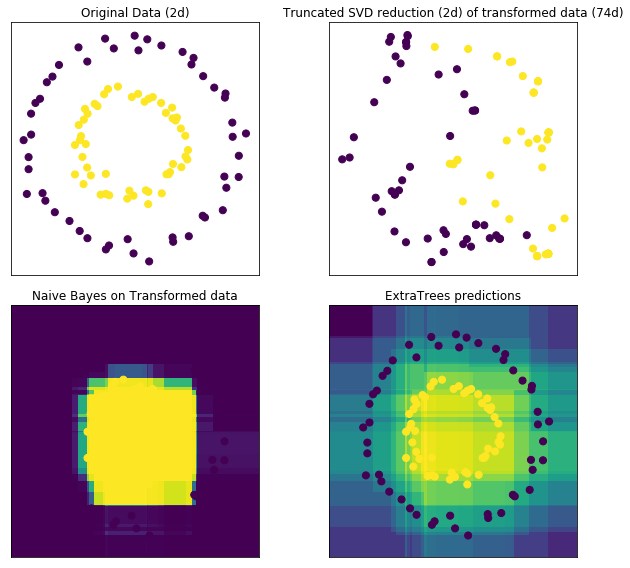

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_circles
from sklearn.ensemble import RandomTreesEmbedding, ExtraTreesClassifier
from sklearn.decomposition import TruncatedSVD
from sklearn.naive_bayes import BernoulliNB

# make a synthetic dataset
X, y = make_circles(factor=0.5, random_state=0, noise=0.05)

# use RandomTreesEmbedding to transform data
hasher = RandomTreesEmbedding(n_estimators=10, random_state=0, max_depth=3)
X_transformed = hasher.fit_transform(X)

# Visualize result after dimensionality reduction using truncated SVD
svd = TruncatedSVD(n_components=2)
X_reduced = svd.fit_transform(X_transformed)

# Learn a Naive Bayes classifier on the transformed data
nb = BernoulliNB()
nb.fit(X_transformed, y)


# Learn an ExtraTreesClassifier for comparison
trees = ExtraTreesClassifier(max_depth=3, n_estimators=10, random_state=0)
trees.fit(X, y)


# scatter plot of original and reduced data
fig = plt.figure(figsize=(9, 8))

ax = plt.subplot(221)
ax.scatter(X[:, 0], X[:, 1], c=y, s=50)
ax.set_title("Original Data (2d)")
ax.set_xticks(())
ax.set_yticks(())

ax = plt.subplot(222)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, s=50)
ax.set_title("Truncated SVD reduction (2d) of transformed data (%dd)" %
             X_transformed.shape[1])
ax.set_xticks(())
ax.set_yticks(())

# Plot the decision in original space. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
h = .01
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# transform grid using RandomTreesEmbedding
transformed_grid = hasher.transform(np.c_[xx.ravel(), yy.ravel()])
y_grid_pred = nb.predict_proba(transformed_grid)[:, 1]

ax = plt.subplot(223)
ax.set_title("Naive Bayes on Transformed data")
ax.pcolormesh(xx, yy, y_grid_pred.reshape(xx.shape))
ax.scatter(X[:, 0], X[:, 1], c=y, s=50)
ax.set_ylim(-1.4, 1.4)
ax.set_xlim(-1.4, 1.4)
ax.set_xticks(())
ax.set_yticks(())

# transform grid using ExtraTreesClassifier
y_grid_pred = trees.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

ax = plt.subplot(224)
ax.set_title("ExtraTrees predictions")
ax.pcolormesh(xx, yy, y_grid_pred.reshape(xx.shape))
ax.scatter(X[:, 0], X[:, 1], c=y, s=50)
ax.set_ylim(-1.4, 1.4)
ax.set_xlim(-1.4, 1.4)
ax.set_xticks(())
ax.set_yticks(())

plt.tight_layout()
plt.show()

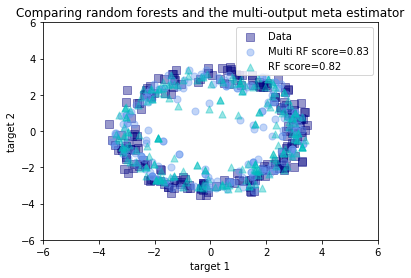

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor


# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(200 * rng.rand(600, 1) - 100, axis=0)
y = np.array([np.pi * np.sin(X).ravel(), np.pi * np.cos(X).ravel()]).T
y += (0.5 - rng.rand(*y.shape))

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size=400,
                                                    random_state=4)

max_depth = 30
regr_multirf = MultiOutputRegressor(RandomForestRegressor(max_depth=max_depth,
                                                          random_state=0))
regr_multirf.fit(X_train, y_train)

regr_rf = RandomForestRegressor(max_depth=max_depth, random_state=2)
regr_rf.fit(X_train, y_train)

# Predict on new data
y_multirf = regr_multirf.predict(X_test)
y_rf = regr_rf.predict(X_test)

# Plot the results
plt.figure()
s = 50
a = 0.4
plt.scatter(y_test[:, 0], y_test[:, 1],
            c="navy", s=s, marker="s", alpha=a, label="Data")
plt.scatter(y_multirf[:, 0], y_multirf[:, 1],
            c="cornflowerblue", s=s, alpha=a,
            label="Multi RF score=%.2f" % regr_multirf.score(X_test, y_test))
plt.scatter(y_rf[:, 0], y_rf[:, 1],
            c="c", s=s, marker="^", alpha=a,
            label="RF score=%.2f" % regr_rf.score(X_test, y_test))
plt.xlim([-6, 6])
plt.ylim([-6, 6])
plt.xlabel("target 1")
plt.ylabel("target 2")
plt.title("Comparing random forests and the multi-output meta estimator")
plt.legend()
plt.show()

### 朴素贝叶斯


In [18]:
from sklearn import datasets
iris = datasets.load_iris()
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(iris.data, iris.target).predict(iris.data)
print("Number of mislabeled points out of a total %d points : %d"
% (iris.data.shape[0],(iris.target != y_pred).sum()))

Number of mislabeled points out of a total 150 points : 6


## 聚类

### k-means

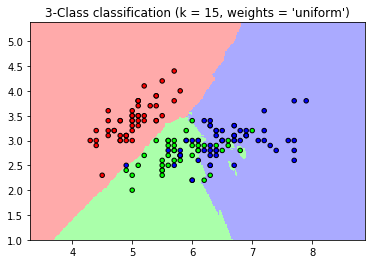

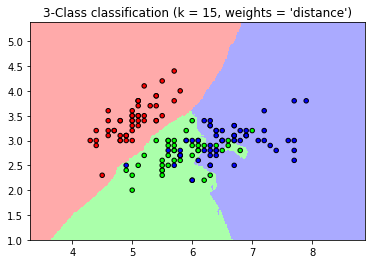

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

n_neighbors = 15

# import some data to play with
iris = datasets.load_iris()

# we only take the first two features. We could avoid this ugly
# slicing by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))

plt.show()

### 密度聚类

None 0.813333333333
0.2 0.82


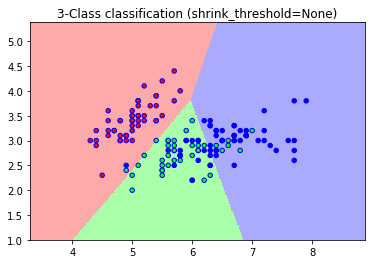

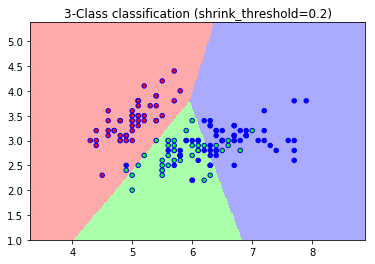

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import datasets
from sklearn.neighbors import NearestCentroid

n_neighbors = 15

# import some data to play with
iris = datasets.load_iris()
# we only take the first two features. We could avoid this ugly
# slicing by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

for shrinkage in [None, .2]:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = NearestCentroid(shrink_threshold=shrinkage)
    clf.fit(X, y)
    y_pred = clf.predict(X)
    print(shrinkage, np.mean(y == y_pred))
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='b', s=20)
    plt.title("3-Class classification (shrink_threshold=%r)"
              % shrinkage)
    plt.axis('tight')

plt.show()

## 降维

### 奇异值分解

#### 奇异值与特征值基础知识：

特征值分解和奇异值分解在机器学习领域都是属于满地可见的方法。两者有着很紧密的关系，我在接下来会谈到，特征值分解和奇异值分解的目的都是一样，就是提取出一个矩阵最重要的特征。先谈谈特征值分解吧：

##### 1）特征值：

如果说一个向量v是方阵A的特征向量，将一定可以表示成下面的形式：

$$Av=\lambda v$$

这时候λ就被称为特征向量v对应的特征值，一个矩阵的一组特征向量是一组正交向量。特征值分解是将一个矩阵分解成下面的形式：

$$A=Q\sum Q$$

其中Q是这个矩阵A的特征向量组成的矩阵，Σ是一个对角阵，每一个对角线上的元素就是一个特征值。我这里引用了一些参考文献中的内容来说明一下。首先，要明确的是，一个矩阵其实就是一个线性变换，因为一个矩阵乘以一个向量后得到的向量，其实就相当于将这个向量进行了线性变换。比如说下面的一个矩阵：

$$M=
\begin{bmatrix}
3 & 0 \\
0 & 1
\end{bmatrix}
$$
    
它其实对应的线性变换是下面的形式：

![](matrix0.png)

因为这个矩阵M乘以一个向量(x,y)的结果是：

$$
\begin{bmatrix}
3 & 0\\
0 & 1
\end{bmatrix}
\begin{bmatrix}
x\\
y
\end{bmatrix}
=
\begin{bmatrix}
3x\\
y
\end{bmatrix}
$$

上面的矩阵是对称的，所以这个变换是一个对x，y轴的方向一个拉伸变换
（每一个对角线上的元素将会对一个维度进行拉伸变换，
当值>1时，是拉长，
当值<1时时缩短）

当矩阵不是对称的时候，假如说矩阵是下面的样子：

$$M=
\begin{bmatrix}
1 & 1\\
0 & 1
\end{bmatrix}
$$

它所描述的变换是下面的样子：

![](matrix1.png)

这其实是在平面上对一个轴进行的拉伸变换（如蓝色的箭头所示），在图中，蓝色的箭头是一个最主要的变化方向（变化方向可能有不止一个），如果我们想要描述好一个变换，那我们就描述好这个变换主要的变化方向就好了。反过头来看看之前特征值分解的式子，分解得到的Σ矩阵是一个对角阵，里面的特征值是由大到小排列的，这些特征值所对应的特征向量就是描述这个矩阵变化方向（从主要的变化到次要的变化排列）

当矩阵是高维的情况下，那么这个矩阵就是高维空间下的一个线性变换，这个线性变化可能没法通过图片来表示，但是可以想象，这个变换也同样有很多的变换方向，我们通过特征值分解得到的前N个特征向量，那么就对应了这个矩阵最主要的N个变化方向。我们利用这前N个变化方向，就可以近似这个矩阵（变换）。也就是之前说的：提取这个矩阵最重要的特征。

总结一下，特征值分解可以得到特征值与特征向量，特征值表示的是这个特征到底有多重要，而特征向量表示这个特征是什么，可以将每一个特征向量理解为一个线性的子空间，我们可以利用这些线性的子空间干很多的事情。不过，特征值分解也有很多的局限，比如说变换的矩阵必须是方阵。

（说了这么多特征值变换，不知道有没有说清楚，请各位多提提意见。）


##### 2）奇异值：

下面谈谈奇异值分解。特征值分解是一个提取矩阵特征很不错的方法，但是它只是对方阵而言的，在现实的世界中，我们看到的大部分矩阵都不是方阵，比如说有N个学生，每个学生有M科成绩，这样形成的一个N * M的矩阵就不可能是方阵，我们怎样才能描述这样普通的矩阵呢的重要特征呢？奇异值分解可以用来干这个事情，奇异值分解是一个能适用于任意的矩阵的一种分解的方法：
    
$$A=U\sum V^T$$

假设A是一个N * M的矩阵，那么得到的U是一个N * N的方阵（里面的向量是正交的，U里面的向量称为左奇异向量），Σ是一个N * M的矩阵（除了对角线的元素都是0，对角线上的元素称为奇异值），V’(V的转置)是一个N * N的矩阵，里面的向量也是正交的，V里面的向量称为右奇异向量），从图片来反映几个相乘的矩阵的大小可得下面的图片

![](matrix2.png)

那么奇异值和特征值是怎么对应起来的呢？首先，我们将一个矩阵A的转置 * A，将会得到一个方阵，我们用这个方阵求特征值可以得到：

$$ (A^T A)v_i=\lambda_i v_i $$

这里得到的v，就是我们上面的右奇异向量。此外我们还可以得到：

$$ \sigma_i=\sqrt{\lambda_i} $$
$$ u_i = \frac{1}{\sigma_i}Av_i $$

这里的$\sigma$就是上面说的奇异值，$u$就是上面说的左奇异向量。奇异值$\sigma$跟特征值类似，在矩阵$\sum$中也是从大到小排列，而且$\sigma$的减少特别的快，在很多情况下，前10%甚至1%的奇异值的和就占了全部的奇异值之和的99%以上了。也就是说，我们也可以用前$r$大的奇异值来近似描述矩阵，这里定义一下部分奇异值分解：

$$ A_{m\times n} \approx U_{m\times r}\Sigma_{r\times r} V^T_{r\times n}$$

r是一个远小于m、n的数，这样矩阵的乘法看起来像是下面的样子：

![](PCA0.png)

右边的三个矩阵相乘的结果将会是一个接近于A的矩阵，在这儿，r越接近于n，则相乘的结果越接近于A。而这三个矩阵的面积之和（在存储观点来说，矩阵面积越小，存储量就越小）要远远小于原始的矩阵A，我们如果想要压缩空间来表示原矩阵A，我们存下这里的三个矩阵：$U、\Sigma、V$就好了。

 

#### 奇异值的计算：

奇异值的计算是一个难题，是一个$O(N^3)$的算法。在单机的情况下当然是没问题的，matlab在一秒钟内就可以算出1000 * 1000的矩阵的所有奇异值，但是当矩阵的规模增长的时候，计算的复杂度呈3次方增长，就需要并行计算参与了。Google的吴军老师在数学之美系列谈到SVD的时候，说起Google实现了SVD的并行化算法，说这是对人类的一个贡献，但是也没有给出具体的计算规模，也没有给出太多有价值的信息。

其实SVD还是可以用并行的方式去实现的，在解大规模的矩阵的时候，一般使用迭代的方法，当矩阵的规模很大（比如说上亿）的时候，迭代的次数也可能会上亿次，如果使用Map-Reduce框架去解，则每次Map-Reduce完成的时候，都会涉及到写文件、读文件的操作。个人猜测Google云计算体系中除了Map-Reduce以外应该还有类似于MPI的计算模型，也就是节点之间是保持通信，数据是常驻在内存中的，这种计算模型比Map-Reduce在解决迭代次数非常多的时候，要快了很多倍。

`Lanczos迭代`就是一种解对称方阵部分特征值的方法（之前谈到了，解$A’* A$得到的对称方阵的特征值就是解A的右奇异向量），是将一个对称的方程化为一个三对角矩阵再进行求解。

按网上的一些文献来看，Google应该是用这种方法去做的奇异值分解的。

请见Wikipedia上面的一些引用的论文，如果理解了那些论文，也“几乎”可以做出一个SVD了。

由于奇异值的计算是一个很枯燥，纯数学的过程，而且前人的研究成果（论文中）几乎已经把整个程序的流程图给出来了。

更多的关于奇异值计算的部分，将在后面的参考文献中给出，这里不再深入，我还是focus在奇异值的应用中去。

 

#### 奇异值与主成分分析（PCA）：

主成分分析在上一节里面也讲了一些，这里主要谈谈如何用SVD去解PCA的问题。PCA的问题其实是一个基的变换，使得变换后的数据有着最大的方差。方差的大小描述的是一个变量的信息量，我们在讲一个东西的稳定性的时候，往往说要减小方差，如果一个模型的方差很大，那就说明模型不稳定了。但是对于我们用于机器学习的数据（主要是训练数据），方差大才有意义，不然输入的数据都是同一个点，那方差就为0了，这样输入的多个数据就等同于一个数据了。以下面这张图为例子：

![](PCA1.png)

这个假设是一个摄像机采集一个物体运动得到的图片，上面的点表示物体运动的位置.

假如我们想要用一条直线去拟合这些点，那我们会选择什么方向的线呢？当然是图上标有signal的那条线。

如果我们把这些点单纯的投影到x轴或者y轴上，最后在x轴与y轴上得到的方差是相似的（因为这些点的趋势是在45度左右的方向，所以投影到x轴或者y轴上都是类似的），如果我们使用原来的xy坐标系去看这些点，容易看不出来这些点真正的方向是什么。

但是如果我们进行坐标系的变化，横轴变成了signal的方向，纵轴变成了noise的方向，则就很容易发现什么方向的方差大，什么方向的方差小了。

一般来说，方差大的方向是信号的方向，方差小的方向是噪声的方向，我们在数据挖掘中或者数字信号处理中，往往要提高信号与噪声的比例，也就是信噪比。对上图来说，如果我们只保留signal方向的数据，也可以对原数据进行不错的近似了。

PCA的全部工作简单点说，就是对原始的空间中顺序地找一组相互正交的坐标轴，第一个轴是使得方差最大的，第二个轴是在与第一个轴正交的平面中使得方差最大的，第三个轴是在与第1、2个轴正交的平面中方差最大的，这样假设在N维空间中，我们可以找到N个这样的坐标轴，我们取前r个去近似这个空间，这样就从一个N维的空间压缩到r维的空间了，但是我们选择的r个坐标轴能够使得空间的压缩使得数据的损失最小。

还是假设我们矩阵每一行表示一个样本，每一列表示一个feature，用矩阵的语言来表示，将一个m * n的矩阵A的进行坐标轴的变化，P就是一个变换的矩阵从一个N维的空间变换到另一个N维的空间，在空间中就会进行一些类似于旋转、拉伸的变化。

$$ A_{m\times n}P_{n\times n}=\widetilde{A}_{m\times n} $$

而将一个$m \times n$的矩阵A变换成一个$m \times r$的矩阵，这样就会使得本来有n个feature的，变成了有r个feature了（r < n)，这r个其实就是对n个feature的一种提炼，我们就把这个称为feature的压缩。用数学语言表示就是：

$$ A_{m\times n}P_{n\times r}=\widetilde{A}_{m\times r} $$ 

但是这个怎么和SVD扯上关系呢？之前谈到，SVD得出的奇异向量也是从奇异值由大到小排列的，按PCA的观点来看，就是方差最大的坐标轴就是第一个奇异向量，方差次大的坐标轴就是第二个奇异向量…我们回忆一下之前得到的SVD式子：

$$ A_{m\times n}\approx U_{m\times r}\Sigma_{r\times r}V^T_{r\times n} $$

在矩阵的两边同时乘上一个矩阵V，由于V是一个正交的矩阵，所以V转置乘以V得到单位阵I，所以可以化成后面的式子

$$ A_{m\times n}V_{r\times n}\approx U_{m\times r}\Sigma_{r\times r}V^T_{r\times n}V_{r\times n} $$
$$ A_{m\times n}V_{r\times n}\approx U_{m\times r}\Sigma_{r\times r} $$

将后面的式子与A * P那个m * n的矩阵变换为m * r的矩阵的式子对照看看，在这里，其实V就是P，也就是一个变化的向量。

这里是将一个m * n 的矩阵压缩到一个m * r的矩阵，也就是对列进行压缩，如果我们想对行进行压缩（在PCA的观点下，对行进行压缩可以理解为，将一些相似的sample合并在一起，或者将一些没有太大价值的sample去掉）怎么办呢？同样我们写出一个通用的行压缩例子：

$$ P_{r\times m}A_{m\times n}=\widetilde{A}_{r\times n} $$

这样就从一个m行的矩阵压缩到一个r行的矩阵了，对SVD来说也是一样的，我们对SVD分解的式子两边乘以$U$的转置$U'$

$$ U^T_{r\times m}A_{m\times n}\approx \Sigma_{r\times r}V^T_{r\times n} $$

这样我们就得到了对行进行压缩的式子。可以看出，其实PCA几乎可以说是对SVD的一个包装，如果我们实现了SVD，那也就实现了PCA了，而且更好的地方是，有了SVD，我们就可以得到两个方向的PCA，如果我们对A’A进行特征值的分解，只能得到一个方向的PCA。

 

#### 四、奇异值与潜在语义索引LSI：

潜在语义索引（Latent Semantic Indexing）与PCA不太一样，至少不是实现了SVD就可以直接用的，不过LSI也是一个严重依赖于SVD的算法，之前吴军老师在矩阵计算与文本处理中的分类问题中谈到：

- “三个矩阵有非常清楚的物理含义。第一个矩阵X中的每一行表示意思相关的一类词，其中的每个非零元素表示这类词中每个词的重要性（或者说相关性），数值越大越相关。最后一个矩阵Y中的每一列表示同一主题一类文章，其中每个元素表示这类文章中每篇文章的相关性。中间的矩阵则表示类词和文章雷之间的相关性。因此，我们只要对关联矩阵A进行一次奇异值分解，w 我们就可以同时完成了近义词分类和文章的分类。（同时得到每类文章和每类词的相关性）。”

上面这段话可能不太容易理解，不过这就是LSI的精髓内容，我下面举一个例子来说明一下，下面的例子来自LSA tutorial，具体的网址我将在最后的引用中给出：

![](PCA2.png)

这就是一个矩阵，不过不太一样的是，这里的一行表示一个词在哪些title中出现了（一行就是之前说的一维feature），一列表示一个title中有哪些词，（这个矩阵其实是我们之前说的那种一行是一个sample的形式的一种转置，这个会使得我们的左右奇异向量的意义产生变化，但是不会影响我们计算的过程）。比如说T1这个title中就有guide、investing、market、stock四个词，各出现了一次，我们将这个矩阵进行SVD，得到下面的矩阵：

image      左奇异向量表示词的一些特性，右奇异向量表示文档的一些特性，中间的奇异值矩阵表示左奇异向量的一行与右奇异向量的一列的重要程序，数字越大越重要。

![](PCA3.png)

继续看这个矩阵还可以发现一些有意思的东西

- 首先，左奇异向量的第一列表示每一个词的出现频繁程度，虽然不是线性的，但是可以认为是一个大概的描述，比如book是0.15对应文档中出现的2次，investing是0.74对应了文档中出现了9次，rich是0.36对应文档中出现了3次；

- 其次，右奇异向量中一的第一行表示每一篇文档中的出现词的个数的近似，比如说，T6是0.49，出现了5个词，T2是0.22，出现了2个词。

- 然后我们反过头来看，我们可以将左奇异向量和右奇异向量都取后2维（之前是3维的矩阵），投影到一个平面上，可以得到：

![](PCA4.png)


在图上，每一个红色的点，都表示一个词，每一个蓝色的点，都表示一篇文档，这样我们可以对这些词和文档进行聚类，比如说stock 和 market可以放在一类，因为他们老是出现在一起，real和estate可以放在一类，dads，guide这种词就看起来有点孤立了，我们就不对他们进行合并了。按这样聚类出现的效果，可以提取文档集合中的近义词，这样当用户检索文档的时候，是用语义级别（近义词集合）去检索了，而不是之前的词的级别。这样一减少我们的检索、存储量，因为这样压缩的文档集合和PCA是异曲同工的，二可以提高我们的用户体验，用户输入一个词，我们可以在这个词的近义词的集合中去找，这是传统的索引无法做到的。
    
     
[另一篇精彩的讲解](http://blog.csdn.net/redline2005/article/details/24100293)

如果学习分类算法，最好从线性的入手，线性分类器最简单的就是LDA，它可以看做是简化版的SVM，如果想理解SVM这种分类器，那理解LDA就是很有必要的了。

谈到LDA，就不得不谈谈PCA，PCA是一个和LDA非常相关的算法，从推导、求解、到算法最终的结果，都有着相当的相似。

本次的内容主要是以推导数学公式为主，都是从算法的物理意义出发，然后一步一步最终推导到最终的式子，LDA和PCA最终的表现都是解一个矩阵特征值的问题，但是理解了如何推导，才能更深刻的理解其中的含义。

本次内容要求读者有一些基本的线性代数基础，比如说特征值、特征向量的概念，空间投影，点乘等的一些基本知识等。除此之外的其他公式、我都尽量讲得更简单清楚。

### 线性判别分析(LDA,Linear Discriminant Analysis)

LDA的全称是Linear Discriminant Analysis（线性判别分析），是一种supervised learning。有些资料上也称为是Fisher’s Linear Discriminant，因为它被Ronald Fisher发明自1936年.

Discriminant这次词我个人的理解是，一个模型，不需要去通过概率的方法来训练、预测数据，比如说各种贝叶斯方法，就需要获取数据的先验、后验概率等等。LDA是在目前机器学习、数据挖掘领域经典且热门的一个算法，据我所知，百度的商务搜索部里面就用了不少这方面的算法。

LDA的原理是，将带上标签的数据（点），通过投影的方法，投影到维度更低的空间中，使得投影后的点，会形成按类别区分，一簇一簇的情况，相同类别的点，将会在投影后的空间中更接近。要说明白LDA，首先得弄明白线性分类器(Linear Classifier)：因为LDA是一种线性分类器。对于K-分类的一个分类问题，会有K个线性函数：

$$y_k(x)=w_k^Tx+w_{k_0}$$

当满足条件：对于所有的$j$，都有$Yk > Yj$,的时候，我们就说$x$属于类别$k$。对于每一个分类，都有一个公式去算一个分值，在所有的公式得到的分值中，找一个最大的，就是所属的分类了。

上式实际上就是一种投影，是将一个高维的点投影到一条高维的直线上，LDA最求的目标是，给出一个标注了类别的数据集，投影到了一条直线之后，能够使得点尽量的按类别区分开，当k=2即二分类问题的时候，如下图所示：

![](PCA0.gif)

红色的方形的点为0类的原始点、蓝色的方形点为1类的原始点，经过原点的那条线就是投影的直线，从图上可以清楚的看到，红色的点和蓝色的点被原点明显的分开了，这个数据只是随便画的，如果在高维的情况下，看起来会更好一点。下面我来推导一下二分类LDA问题的公式：

假设用来区分二分类的直线（投影函数)为：

$$ y=w^T x $$

LDA分类的一个目标是使得不同类别之间的距离越远越好，同一类别之中的距离越近越好，所以我们需要定义几个关键的值。

类别i的原始中心点为：（Di表示属于类别i的点)

$$ m_i=\frac{1}{n_i}\sum_{x\in D_i}x $$

类别i投影后的中心点为：

$$ \tilde{m_i}=w^T m_i $$

衡量类别i投影后，类别点之间的分散程度（方差）为：

$$ \tilde{s_i}=\sum_{y\in Y_i}(y-\tilde{m_i})^2 $$

最终我们可以得到一个下面的公式，表示LDA投影到w后的损失函数：

$$ J(w)=\frac{|\tilde{m_1}-\tilde{m_2}|^2}{\tilde{s_1}^2+\tilde{s_2}^2} $$

我们分类的目标是，`使得类别内的点距离越近越好`（集中），类别间的点越远越好。分母表示每一个类别内的方差之和，方差越大表示一个类别内的点越分散，分子为两个类别各自的中心点的距离的平方，我们最大化J(w)就可以求出最优的w了。想要求出最优的w，可以使用拉格朗日乘子法，但是现在我们得到的J(w)里面，w是不能被单独提出来的，我们就得想办法将w单独提出来。

我们定义一个投影前的各类别分散程度的矩阵，这个矩阵看起来有一点麻烦，其实意思是，如果某一个分类的输入点集$D_i$里面的点距离这个分类的中心店$m_i$越近，则$S_i$里面元素的值就越小，如果分类的点都紧紧地围绕着$m_i$，则$S_i$里面的元素值越更接近0.

$$ S_i=\sum_{x\in D_i}(x-m_i)(x-m_i)^T $$

带入$S_i$，将$J(w)$分母化为：

$$ \tilde{s_i}=\sum_{x\in D_i}(w^T x-w^T m_i)^2=\sum_{x\in D_i}w^T(x-m_i)(x-m_i)^Tw=w^T S_i w $$

$$ \tilde{s_1}^2+\tilde{s_2}^2=w^T(S_1+S_2)w=w^T S_w W $$

同样的将J(w)分子化为：

$$ |\tilde{m_1}-\tilde{m_2}|^2=w^T(m_1-m_2)(m_1-m_2)^T w=w^T S_B w $$

这样损失函数可以化成下面的形式：

$$ J(w)=\frac{w^T S_B w}{w^T S_w w} $$

   这样就可以用最喜欢的拉格朗日乘子法了，但是还有一个问题，如果分子、分母是都可以取任意值的，那就会使得有无穷解，我们将分母限制为长度为1（这是用拉格朗日乘子法一个很重要的技巧，在下面将说的PCA里面也会用到，如果忘记了，请复习一下高数），并作为拉格朗日乘子法的限制条件，带入得到：

$$ 
\begin{align}
c(w) &=w^T S_B w-\lambda(w^T S_w w-1)\\
\Rightarrow \frac{dc}{dw}&=2S_B w-2\lambda S_w w=0\\
\Rightarrow S_B w & =\lambda S_w w
\end{align}
$$

这样的式子就是一个求特征值的问题了。

对于$N(N>2)$分类的问题，我就直接写出下面的结论了：

$$ 
\begin{align}
S_w & =\sum_{i=1}^c S_i\\
S_B & =\sum_{i=1}^c n_i(m_i-m)(m_i-m)^T\\
S_B w_i & = \lambda S_w w_i
\end{align}
$$

这同样是一个求特征值的问题，我们求出的第i大的特征向量，就是对应的$W_i$了。

这里想多谈谈特征值，特征值在纯数学、量子力学、固体力学、计算机等等领域都有广泛的应用，特征值表示的是矩阵的性质，当我们取到矩阵的前N个最大的特征值的时候，我们可以说提取到的矩阵主要的成分（这个和之后的PCA相关，但是不是完全一样的概念）。在机器学习领域，不少的地方都要用到特征值的计算，比如说图像识别、pagerank、LDA、还有之后将会提到的PCA等等。

下图是图像识别中广泛用到的特征脸（eigen face），提取出特征脸有两个目的，首先是为了压缩数据，对于一张图片，只需要保存其最重要的部分就是了，然后是为了使得程序更容易处理，在提取主要特征的时候，很多的噪声都被过滤掉了。跟下面将谈到的PCA的作用非常相关。

![](PCA5.png)

特征值的求法有很多，求一个D * D的矩阵的时间复杂度是O(D^3), 也有一些求Top M的方法，比如说power method，它的时间复杂度是O(D^2 * M), 总体来说，求特征值是一个很费时间的操作，如果是单机环境下，是很局限的。


### 主成分分析(PCA,Principal Component Analysis)

主成分分析（PCA）与LDA有着非常近似的意思，LDA的输入数据是带标签的，而PCA的输入数据是不带标签的，所以PCA是一种unsupervised learning。

LDA通常来说是作为一个独立的算法存在，给定了训练数据后，将会得到一系列的判别函数（discriminate function），之后对于新的输入，就可以进行预测了。

而PCA更像是一个预处理的方法，它可以将原本的数据降低维度，而使得降低了维度的数据之间的方差最大（也可以说投影误差最小，具体在之后的推导里面会谈到）。

方差这个东西是个很有趣的，有些时候我们会考虑减少方差（比如说训练模型的时候，我们会考虑到方差-偏差的均衡），有的时候我们会尽量的增大方差。方差就像是一种信仰（强哥的话），不一定会有很严密的证明，从实践来说，通过尽量增大投影方差的PCA算法，确实可以提高我们的算法质量。

说了这么多，推推公式可以帮助我们理解。我下面将用两种思路来推导出一个同样的表达式。首先是最大化投影后的方差，其次是最小化投影后的损失（投影产生的损失最小）。

##### 最大化方差法：

假设我们还是将一个空间中的点投影到一个向量中去。首先，给出原空间的中心点：

$$ \bar{x}=\frac{1}{N}\sum_{n=1}^{N}x_n $$

假设u1为投影向量，投影之后的方差为：

$$ \frac{1}{N}\sum_{n=1}^{N}\{ u_i^T x_n-u_1^T \bar{x} \}^2 = u_1^T S u_1 $$

上面这个式子如果看懂了之前推导LDA的过程，应该比较容易理解，如果线性代数里面的内容忘记了，可以再温习一下，优化上式等号右边的内容，还是用拉格朗日乘子法：

$$ u_1^T S u_1+\lambda_1(1-u_1^Tu_1) $$

将上式求导，使之为0，得到：

$$ Su_1-\lambda_1 u_1 $$

这是一个标准的特征值表达式了，λ对应的特征值，u对应的特征向量。上式的左边取得最大值的条件就是λ1最大，也就是取得最大的特征值的时候。假设我们是要将一个D维的数据空间投影到M维的数据空间中（M < D)， 那我们取前M个特征向量构成的投影矩阵就是能够使得方差最大的矩阵了。

##### 最小化损失法：

假设输入数据x是在D维空间中的点，那么，我们可以用D个正交的D维向量去完全的表示这个空间（这个空间中所有的向量都可以用这D个向量的线性组合得到）。在D维空间中，有无穷多种可能找这D个正交的D维向量，哪个组合是最合适的呢？

假设我们已经找到了这D个向量，可以得到：

$$ x_n=\sum_{i=1}^D \alpha_{ni}u_i $$

我们可以用近似法来表示投影后的点：

$$ \tilde{x_n}=\sum_{i=1}^M z_{ni}u_i + \sum_{i=M+1}^D b_iu_i $$

上式表示，得到的新的x是由前$M$ 个基的线性组合加上后$D - M$个基的线性组合，注意这里的$z$是对于每个$x$都不同的，而b对于每个x是相同的，这样我们就可以用$M$个数来表示空间中的一个点，也就是使得数据降维了。但是这样降维后的数据，必然会产生一些扭曲，我们用$J$描述这种扭曲，我们的目标是，使得$J$最小：

$$ J=\frac{1}{N}\sum_{n=1}^N \| x_n-\tilde{x_n} \|^2 $$

上式的意思很直观，就是对于每一个点，将降维后的点与原始的点之间的距离的平方和加起来，求平均值，我们就要使得这个平均值最小。我们令：

$$ \frac{\partial J}{\partial z_{nj}}=0 \Rightarrow z_{nj}=x_n^T u_j, \frac{\partial J}{\partial b_{j}}=0 \Rightarrow b_{j}=\bar{x}^T u_j,  $$

将上面得到的$z$与$b$带入降维的表达式：

$$ x_n-\tilde{x_n}=\sum_{i=M+1}^D \{ (x_n-\bar{x})u_i \}u_i $$

这里又是一个特征值的表达式，我们想要的前M个向量其实就是这里最大的M个特征值所对应的特征向量。证明这个还可以看看，我们$J$可以化为：

$$ J=\frac{1}{N}\sum_{n=1}^N \sum_{i=M+1}^D ( u_i^T x_n-u_1^T \bar{x} )^2 = \sum_{i=M+1}^D u_i^T S u_i $$

也就是当误差$J$是由最小的$D - M$个特征值组成的时候，$J$取得最小值。跟上面的意思相同。
